In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

df = pd.read_csv('processed_data/iteration_metrics_cleaned.csv')
df.columns

Index(['project', 'sprint.name', 'issues', 'velocity', 'work_capacity',
       'sprint.startDate', 'sprint.endDate', 'storypoints', 'sprint_length',
       'focus_factor', 'fields.assignee.name', 'old_devs', 'old_devs_abs',
       'new_devs_abs', 'turnover_abs', 'current_devs_abs', 'turnover',
       'new_devs', 'sprint.nbr', 'TSI', 'TSI_inv', 'individual_velocity',
       'sprint.key'],
      dtype='object')

# Describe

## Focus factor

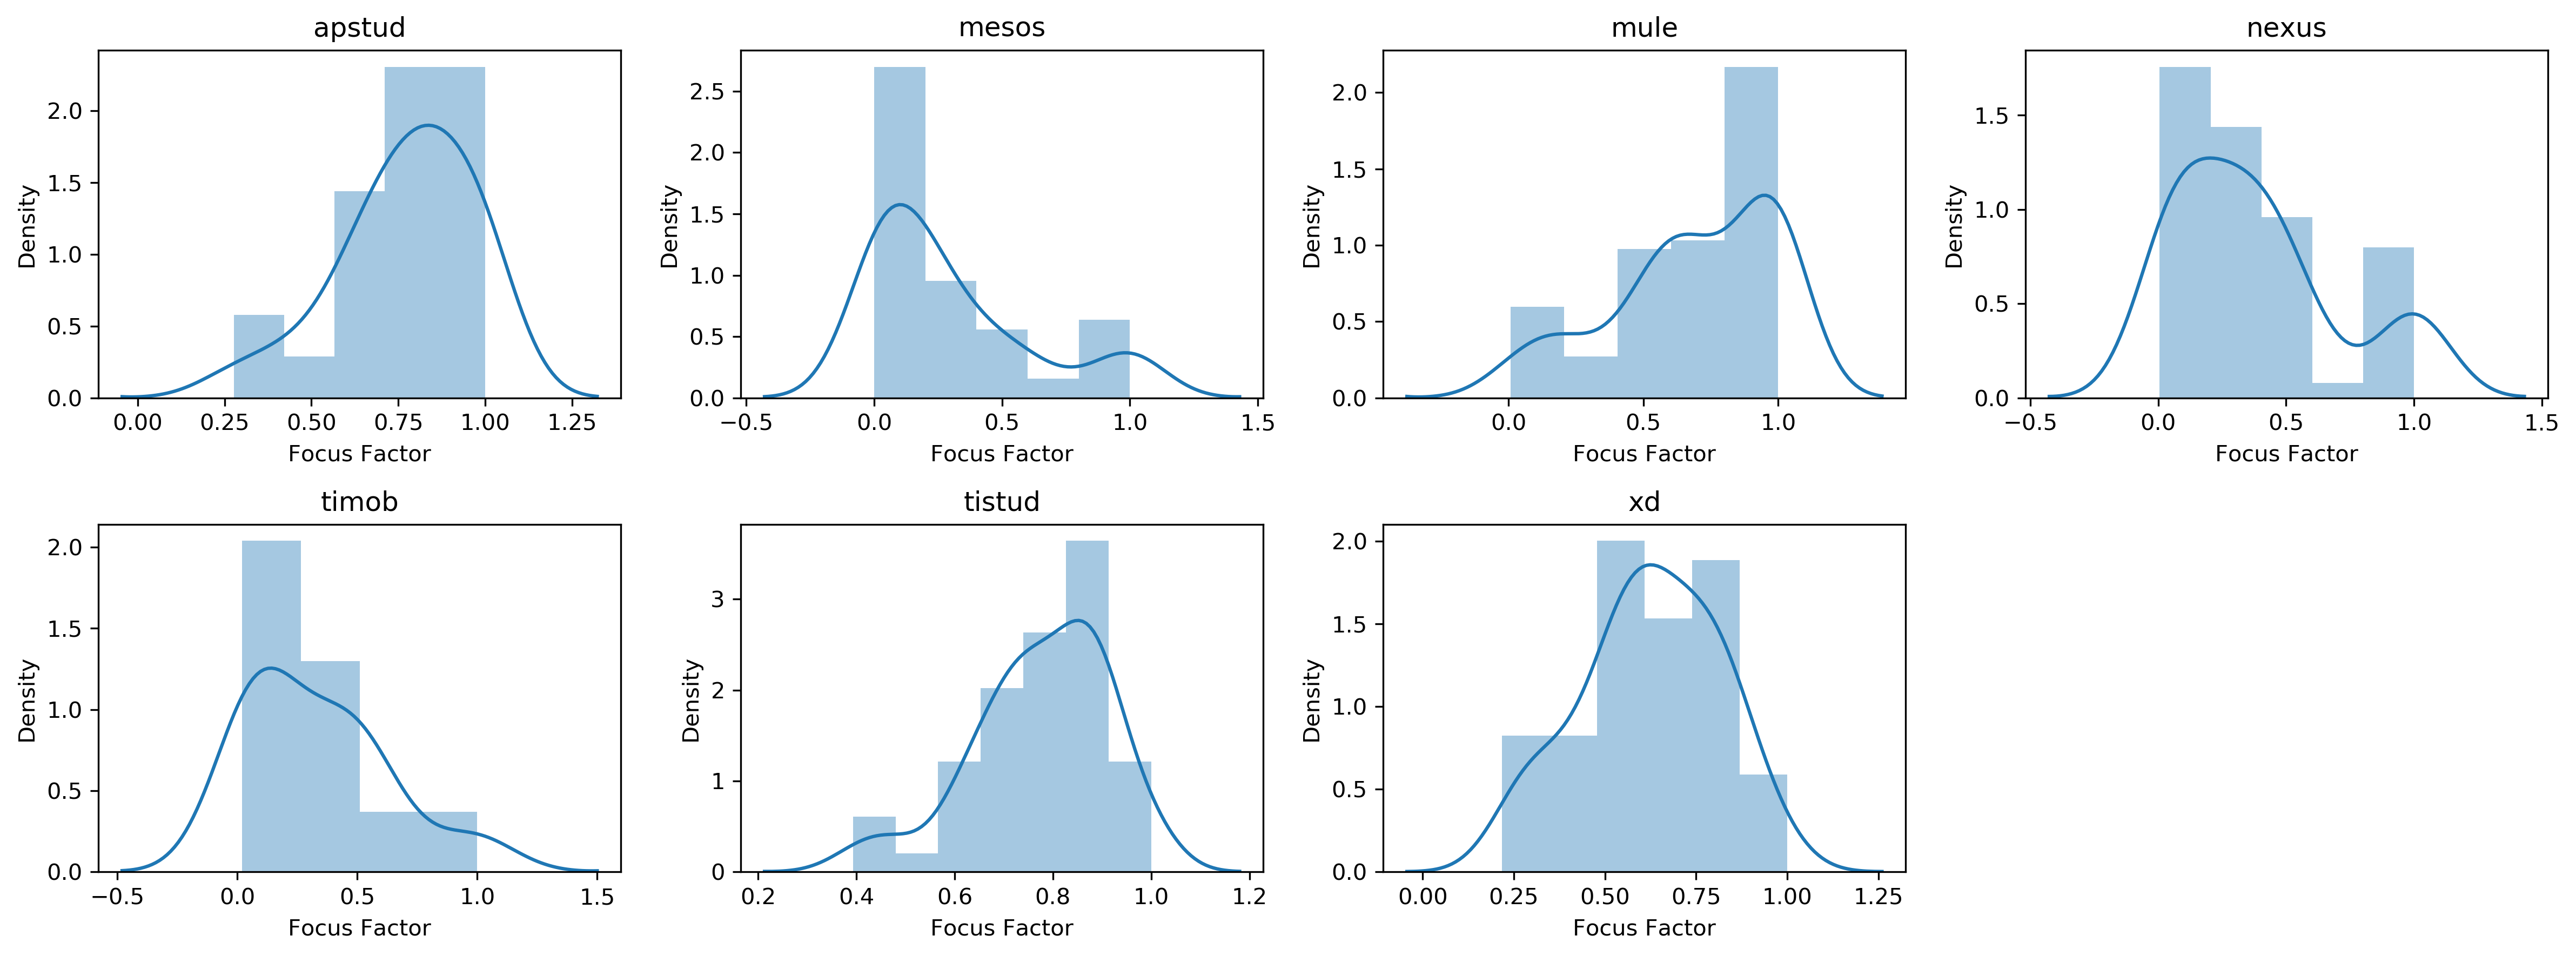

In [2]:
fig = plt.figure(figsize=(16,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='focus_factor')

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()#.rolling(2).mean().plot(style='-o', label='mean', ylim=(0, 1), ax=ax)
    
    sns.distplot(x)
    
    #ax.axhline(y=.7, linestyle='--', alpha=.6)
    #ax.axhline(y=.9, linestyle='--', alpha=.6)

    ax.set_xlabel('Focus Factor')
    ax.set_ylabel('Density')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/focus_factor_dist.png')

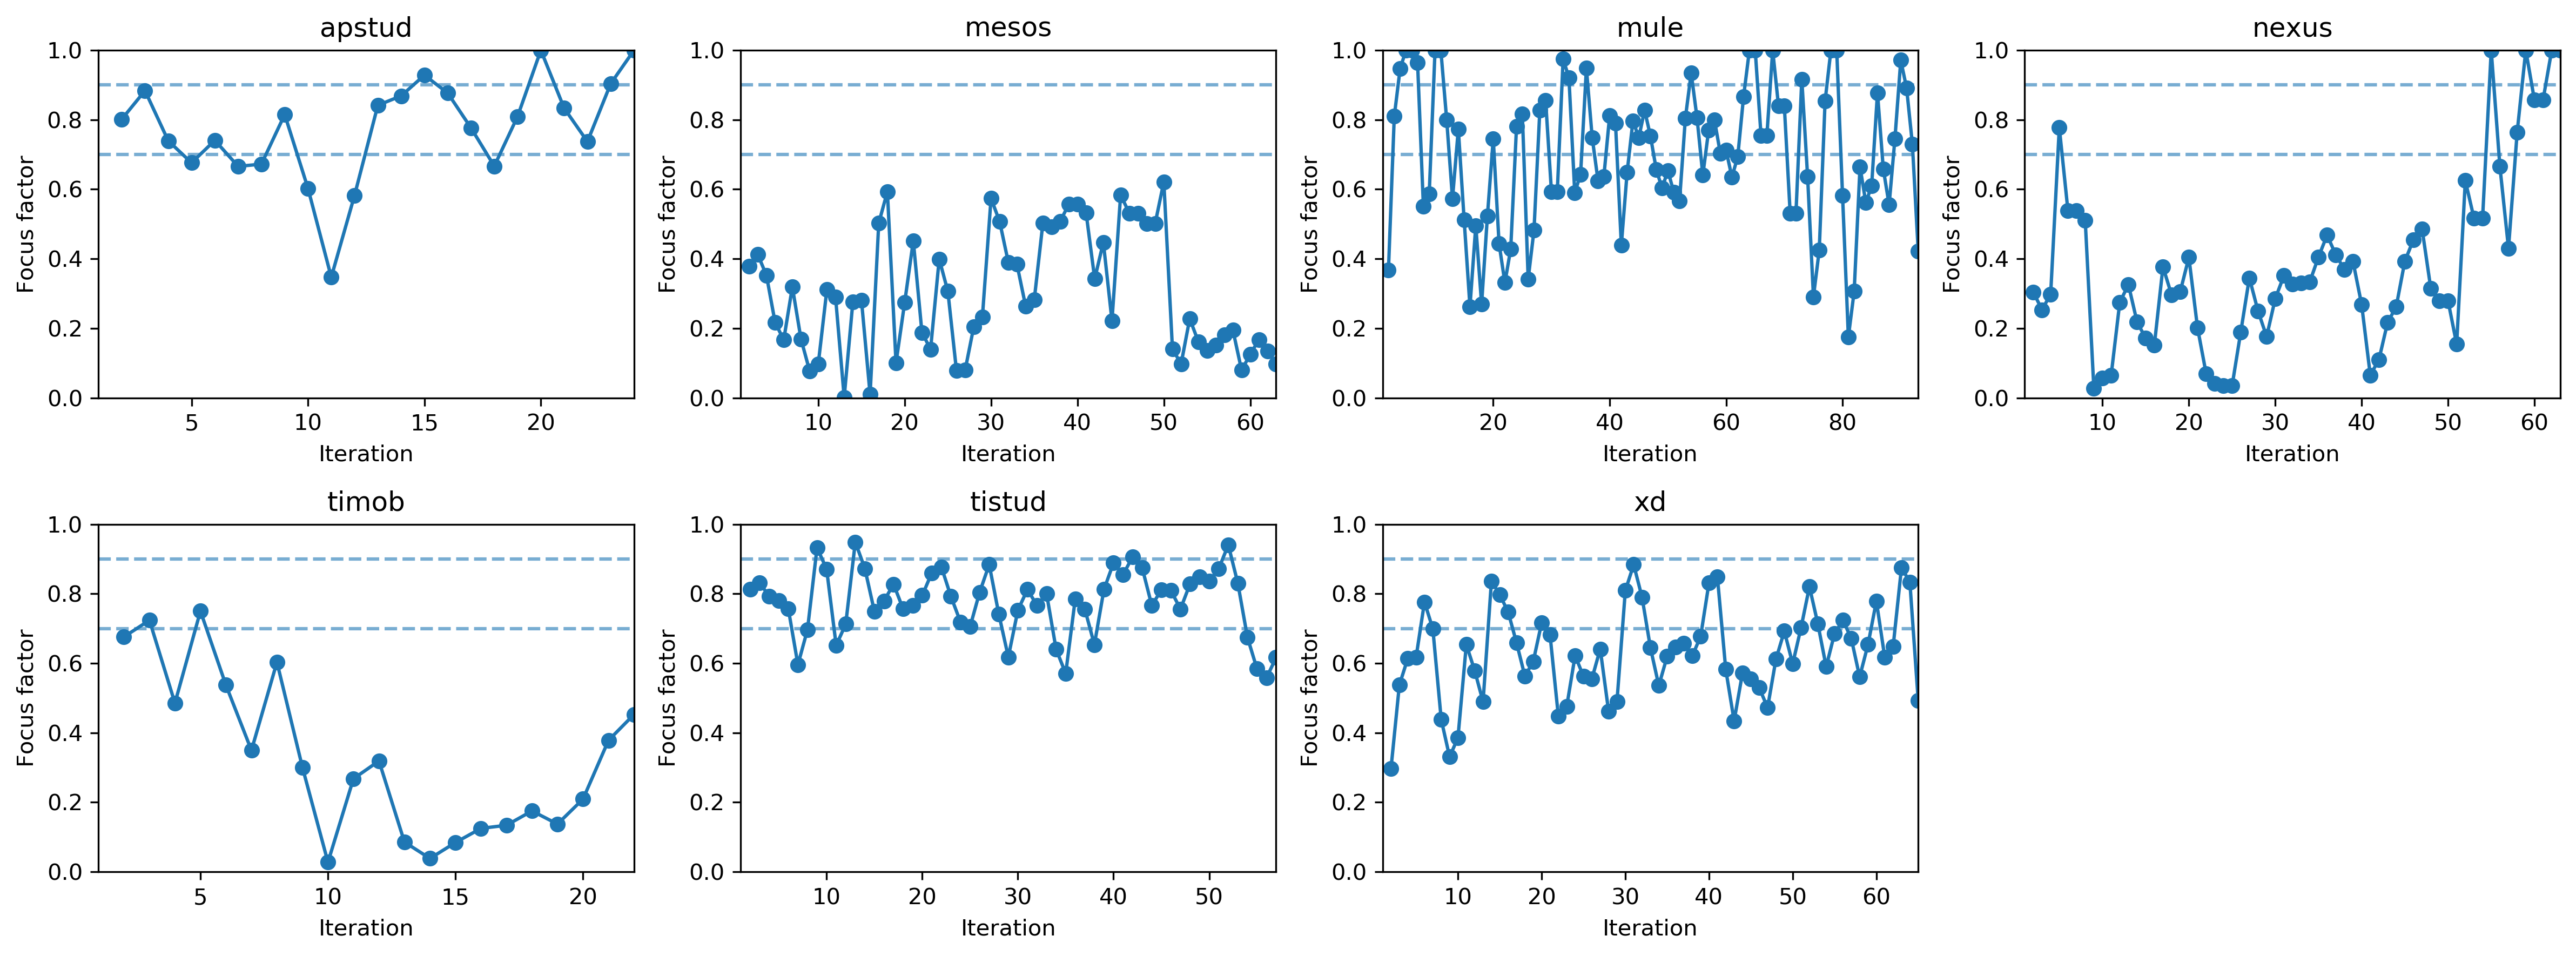

In [3]:
fig = plt.figure(figsize=(16,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='focus_factor')

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    dfx.loc[:, p].dropna().rolling(2).mean().plot(style='-o', label='mean', ylim=(0, 1), ax=ax)
    
    ax.axhline(y=.7, linestyle='--', alpha=.6)
    ax.axhline(y=.9, linestyle='--', alpha=.6)

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Focus factor')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/focus_factor_all.png')

## individual velocity

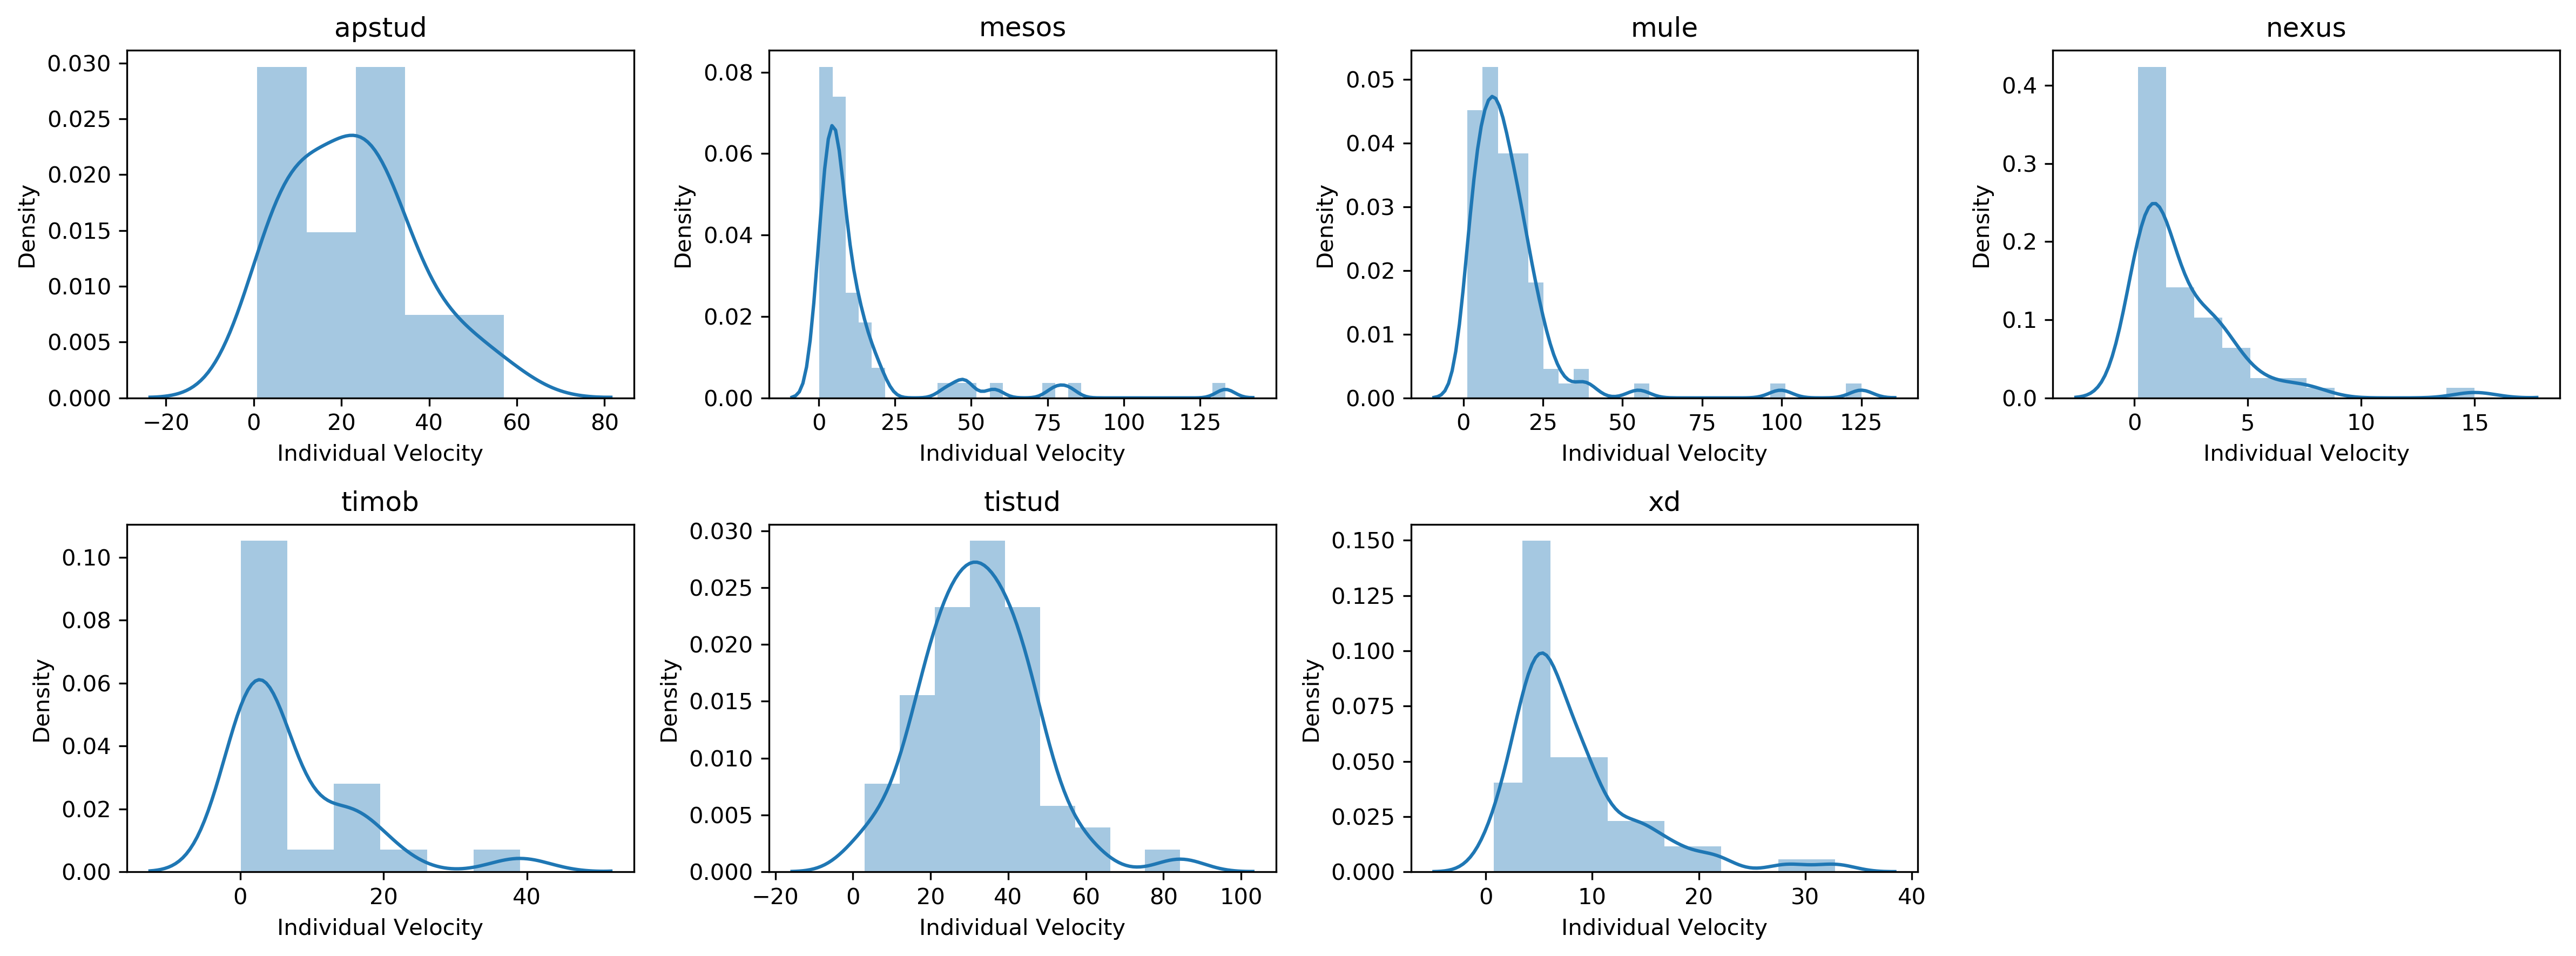

In [4]:
fig = plt.figure(figsize=(16,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()#.rolling(2).mean().plot(style='-o', label='mean', ylim=(0, 1), ax=ax)
    
    sns.distplot(x)
    
    #ax.axhline(y=.7, linestyle='--', alpha=.6)
    #ax.axhline(y=.9, linestyle='--', alpha=.6)

    ax.set_xlabel('Individual Velocity')
    ax.set_ylabel('Density')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/individual_velocity_dist.png')

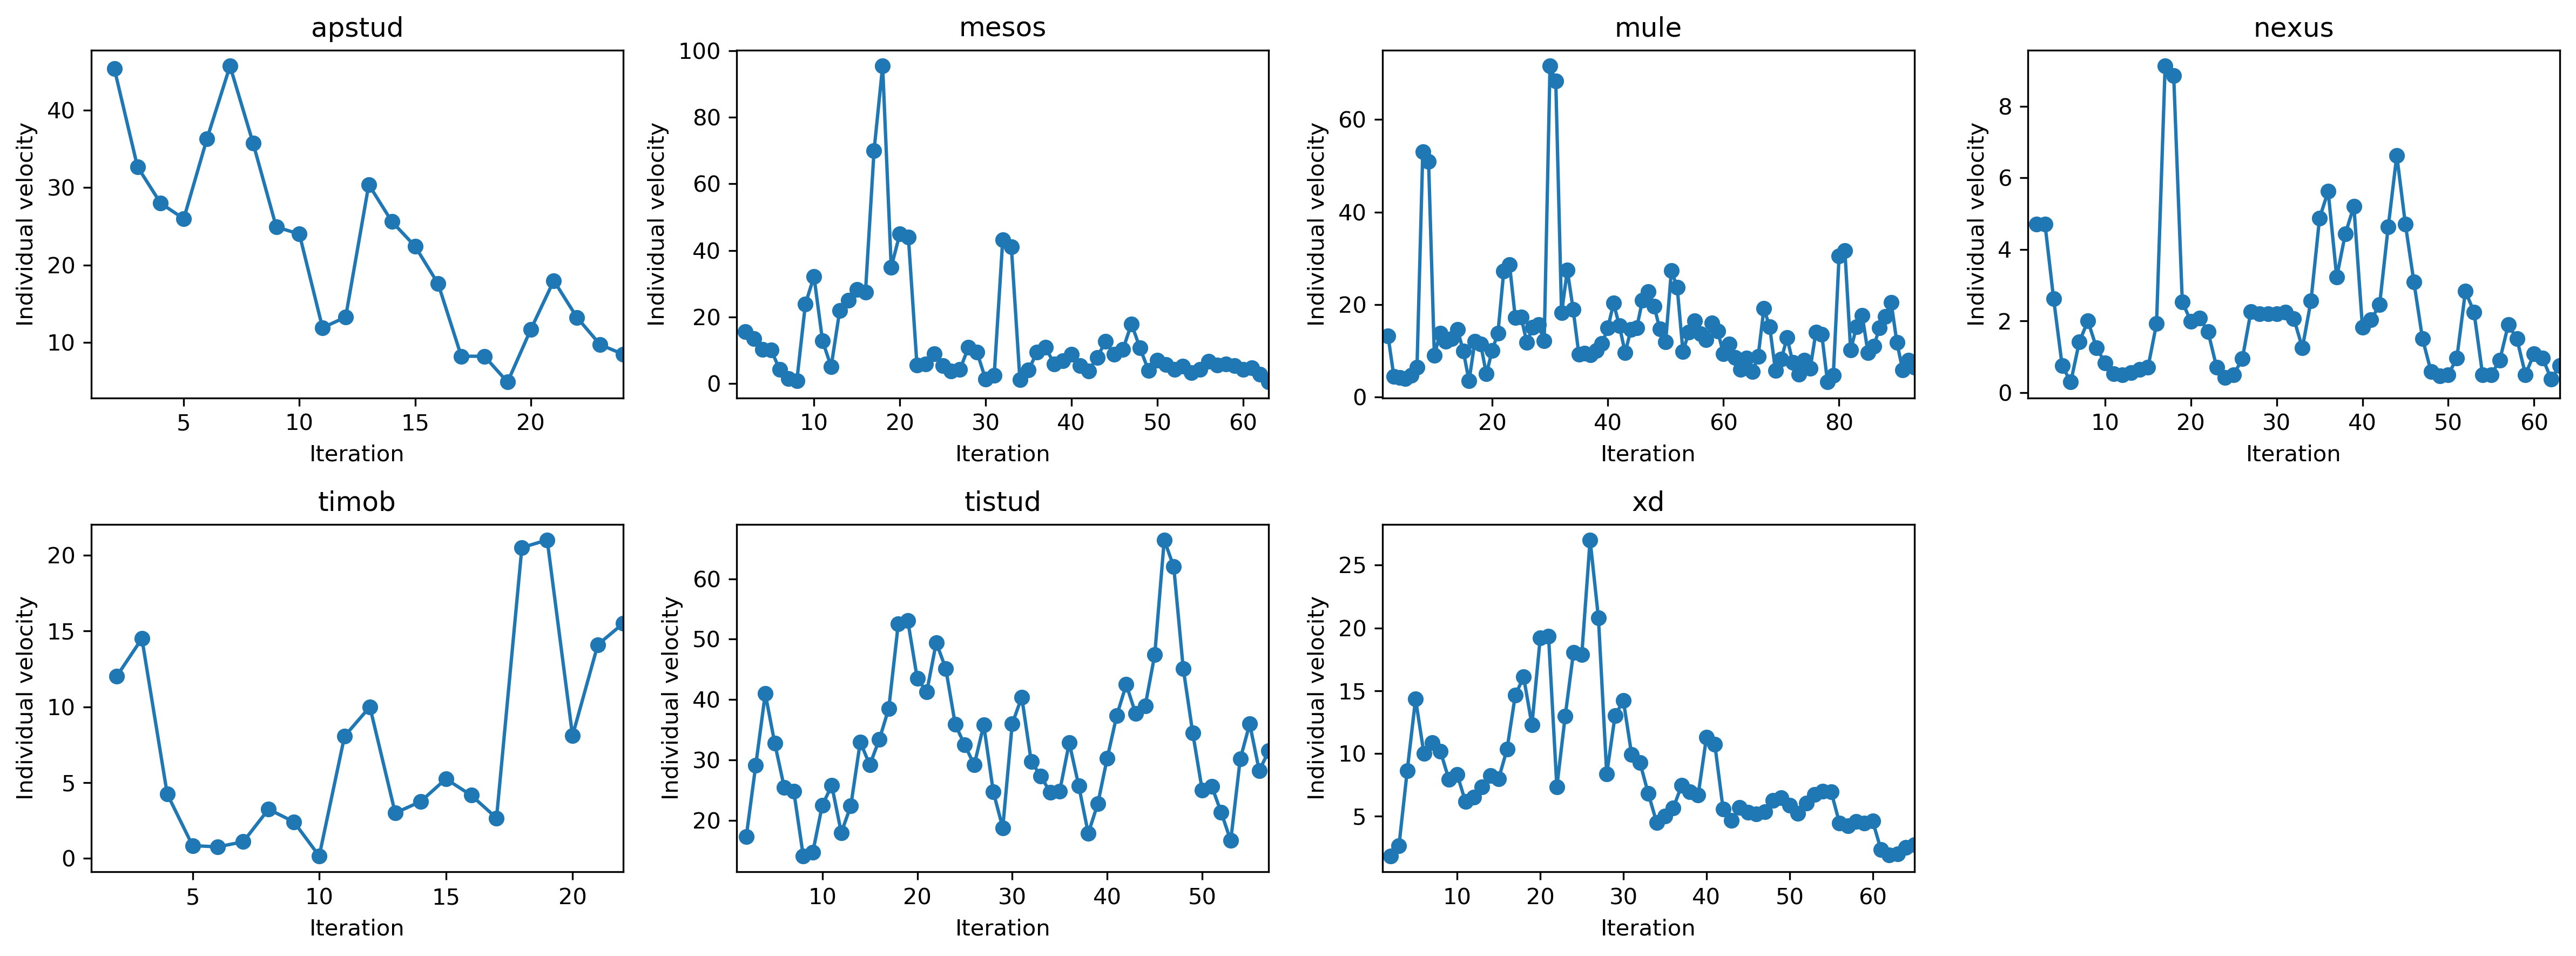

In [5]:
fig = plt.figure(figsize=(16,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    dfx.loc[:, p].dropna().rolling(2).mean().plot(style='-o', label='mean', ax=ax)

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Individual velocity')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/individual_velocity_all.png')

In [6]:
# from the figure, it is clear that mesos has a weird data point around 400 story points.
df = df[df['individual_velocity'] < 300]

## normality check of individual velocity

apstud The null hypothesis cannot be rejected -- normal
mesos The null hypothesis can be rejected -- not normal
  Using log(x):  mesos* The null hypothesis cannot be rejected -- normal
mule The null hypothesis can be rejected -- not normal
  Using log(x):  mule* The null hypothesis cannot be rejected -- normal
nexus The null hypothesis can be rejected -- not normal
  Using log(x):  nexus* The null hypothesis cannot be rejected -- normal
timob The null hypothesis can be rejected -- not normal
  Using log(x):  timob* The null hypothesis cannot be rejected -- normal
tistud The null hypothesis cannot be rejected -- normal
xd The null hypothesis can be rejected -- not normal
  Using log(x):  xd* The null hypothesis cannot be rejected -- normal


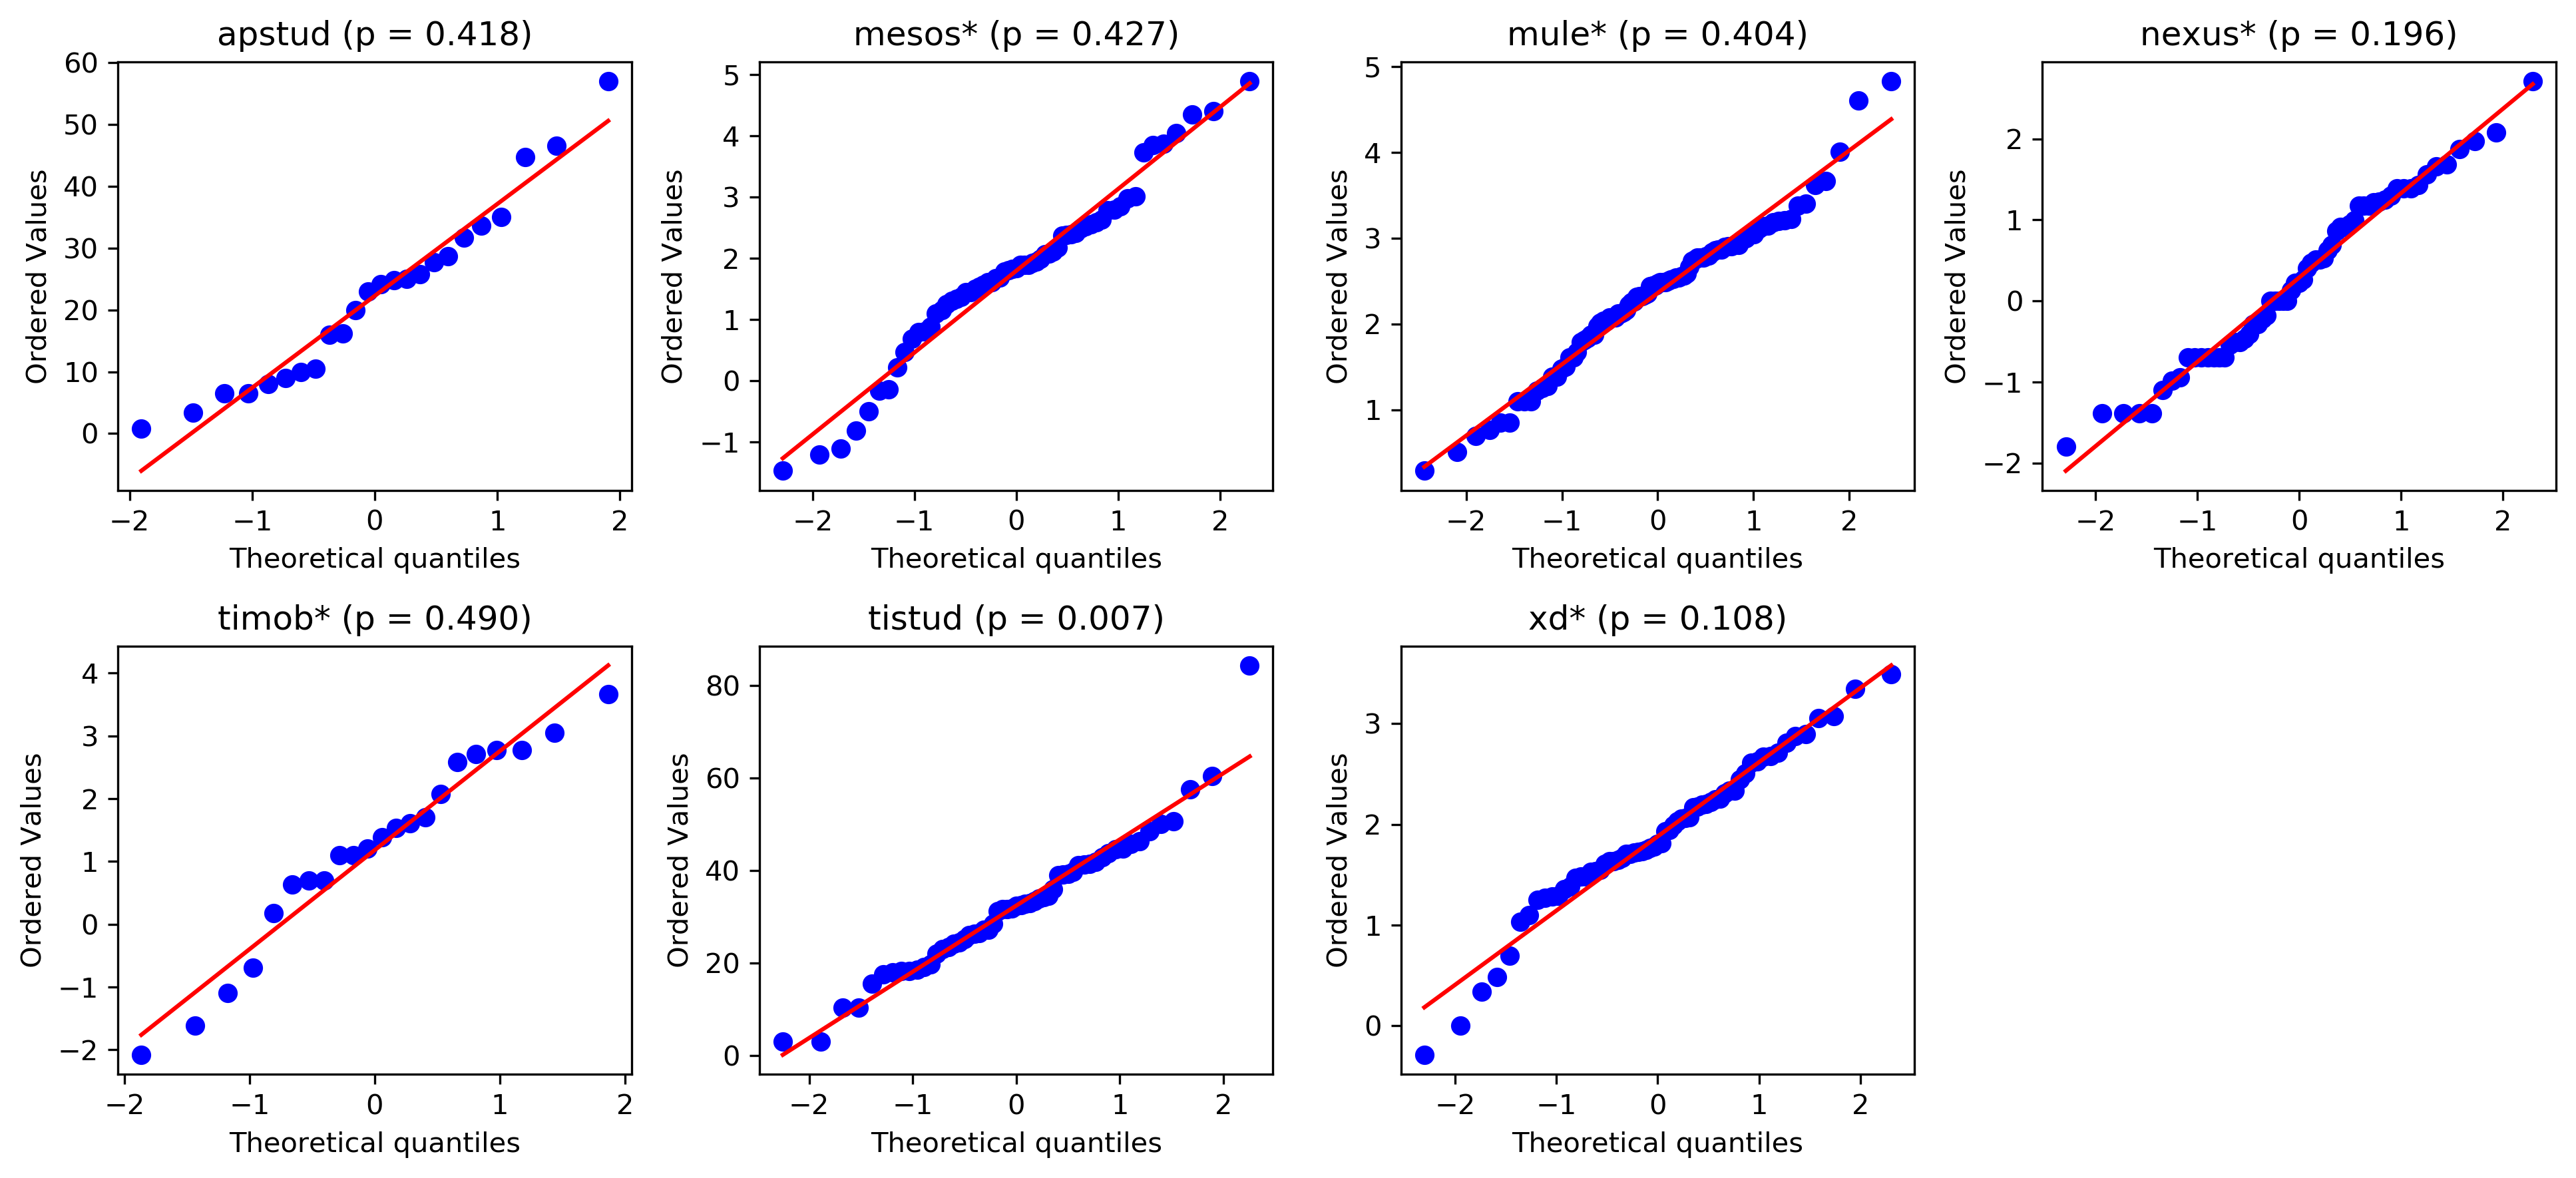

In [7]:
import seaborn as sns
from scipy import stats

fig = plt.figure(figsize=(13,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

#df = df[df['individual_velocity'] < 300]

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()
    
    k2, pv = stats.normaltest(x)
    alpha = 1e-3

    if pv < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected -- not normal")
        x = np.log(x)
        p = p+'*'
        k2, pv = stats.normaltest(x)
        if pv < alpha:  # null hypothesis: x comes from a normal distribution
            print("  Using log(x): ", p, "The null hypothesis can be rejected -- not normal")
        else:
            print("  Using log(x): ", p, "The null hypothesis cannot be rejected -- normal")
    else:
        print(p, "The null hypothesis cannot be rejected -- normal")
        
    
    stats.probplot(x, plot=plt)
    
    title = "{:} (p < .001)".format(p) if pv < .001 else "{:} (p = {:.3f})".format(p, pv)

    ax.set_title(title)
    
    #ax.set_xlabel('Iteration')
    #ax.set_ylabel('Individual velocity')
   
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/individual_velocity_normalitycheck.png')

In conclusion, 
* APSTUD, TISTUD have normal distributions
* The rest have not but they can be transformed by applying log().

## normality check of focus factor

apstud The null hypothesis cannot be rejected -- normal
mesos The null hypothesis cannot be rejected -- normal
mule The null hypothesis cannot be rejected -- normal
nexus The null hypothesis cannot be rejected -- normal
timob The null hypothesis cannot be rejected -- normal
tistud The null hypothesis cannot be rejected -- normal
xd The null hypothesis cannot be rejected -- normal


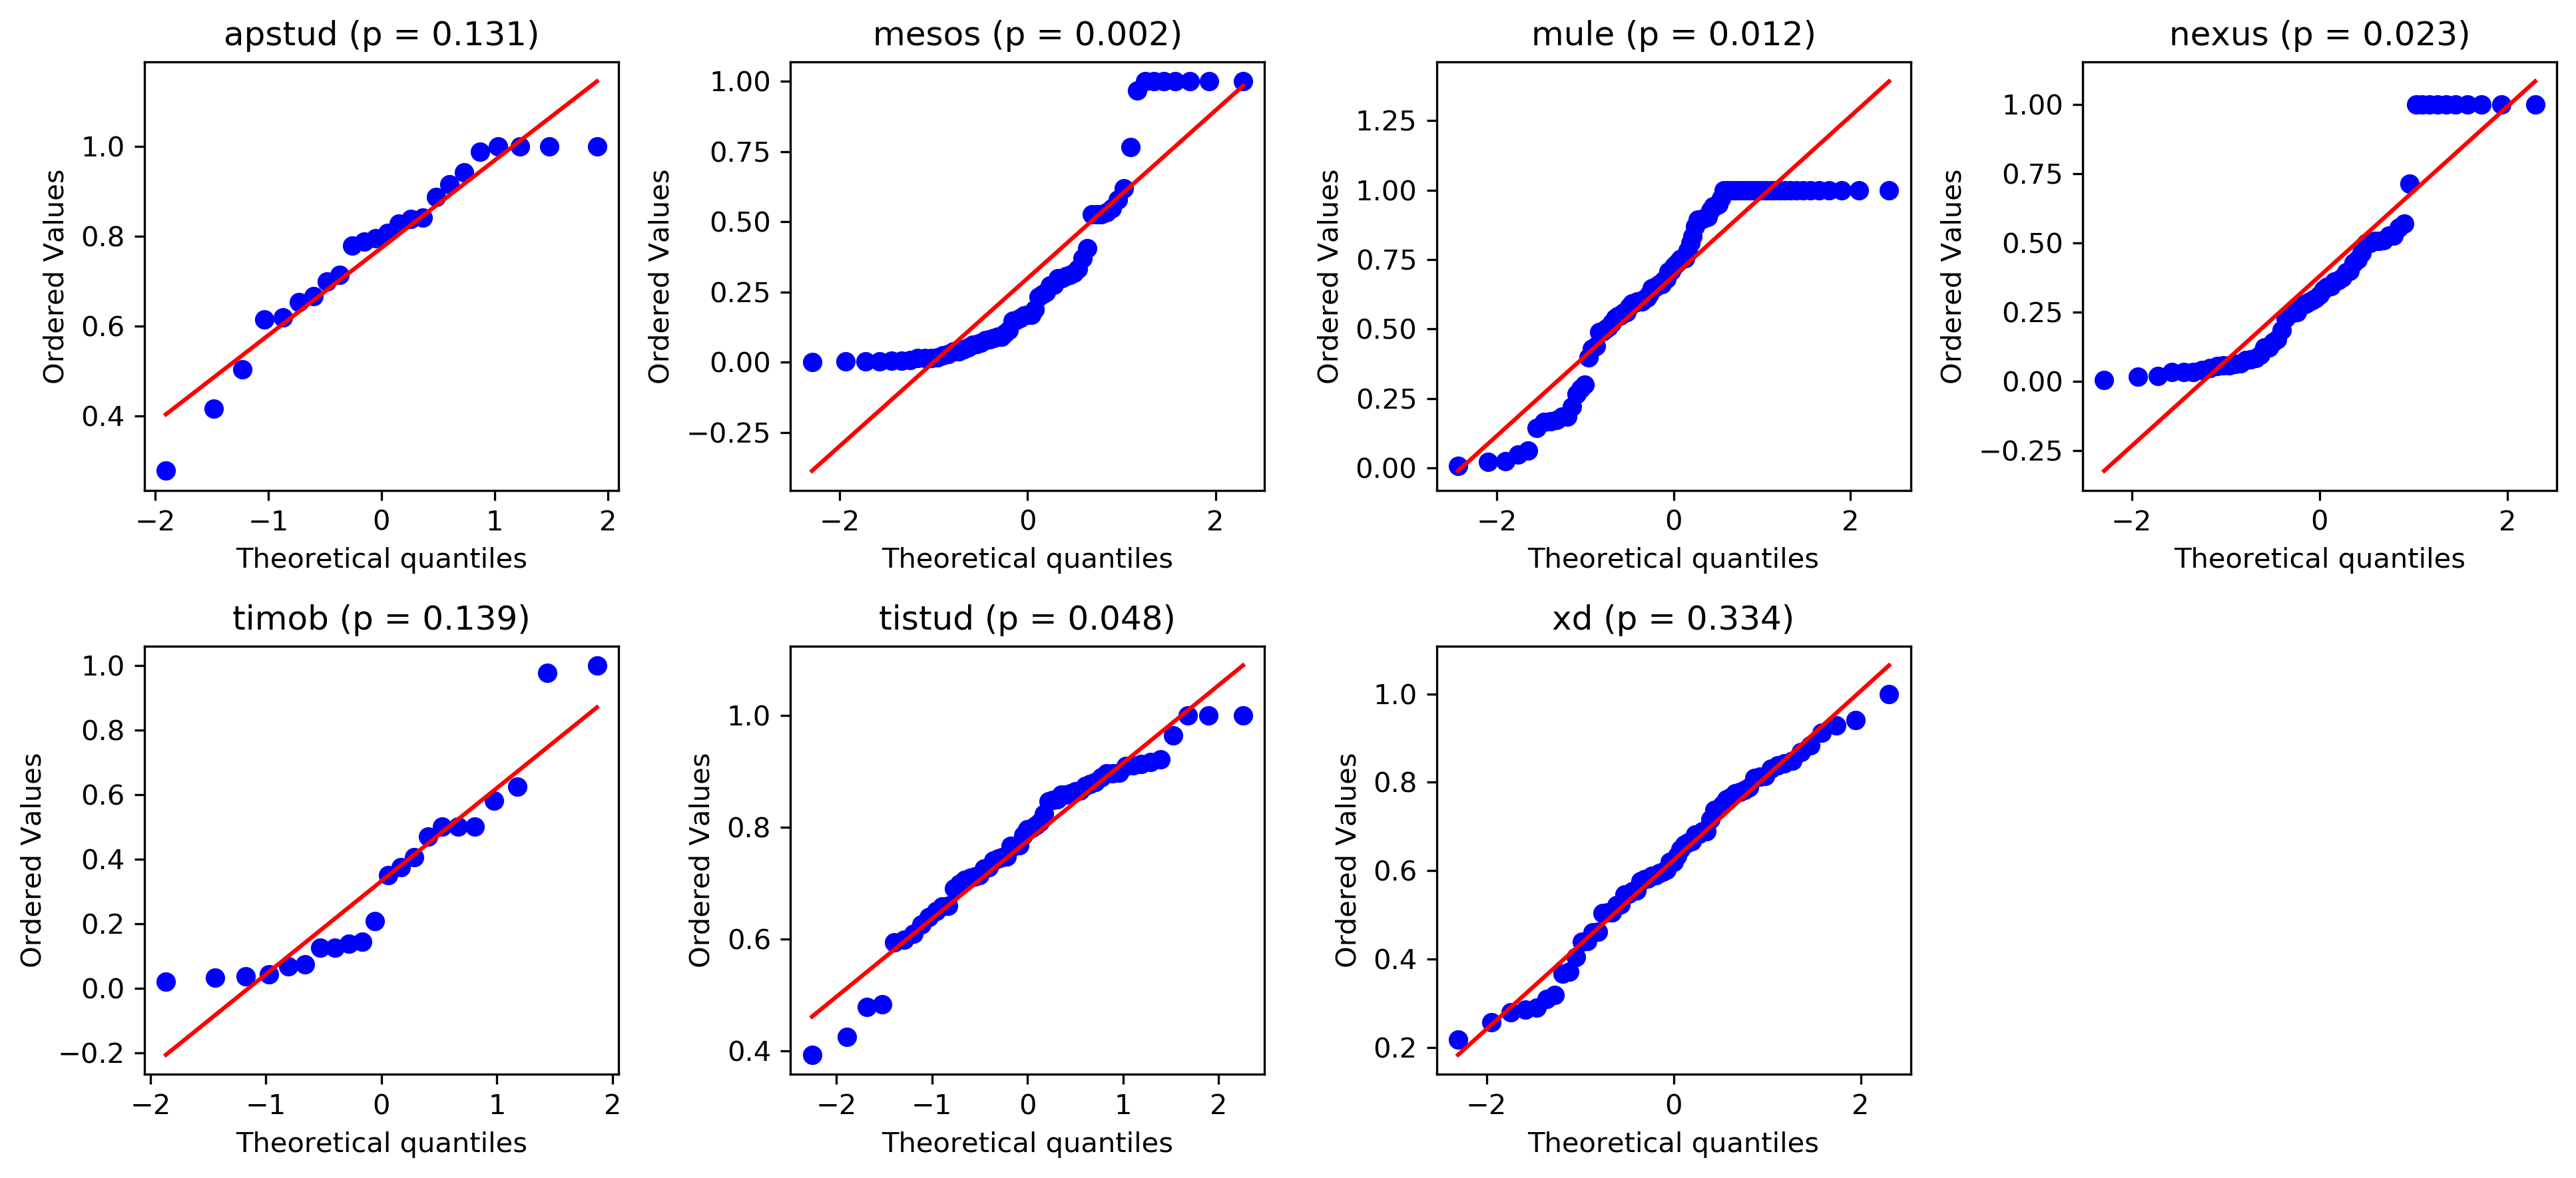

In [8]:
import seaborn as sns
from scipy import stats

fig = plt.figure(figsize=(13,6), dpi=300)

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='focus_factor')

i=0
for p in dfx.columns:
    i = i + 1
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()
    
    k2, pv = stats.normaltest(x)
    alpha = 1e-3

    if pv < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected -- not normal")
    else:
        print(p, "The null hypothesis cannot be rejected -- normal")
    
    stats.probplot(x, plot=plt)
    
    title = "{:} (p < .001)".format(p) if pv < .001 else "{:} (p = {:.3f})".format(p, pv)
    
    ax.set_title(title)
    
    #ax.set_xlabel('Iteration')
    #ax.set_ylabel('Individual velocity')
   
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/focus_factor_normalitycheck.png')

DNN is not normal, so it is removed.

In [9]:
df = df[~df['project'].isin(['dnn'])]

# Contextual factors

* turnover (leavers)
* turnover (newcomers)
* TSI
* sprint lenght

In [10]:
df.head(3)

project     sprint.name  issues  velocity  work_capacity  \
0  apstud  2012 Sprint 03      23     228.0          371.0   
1  apstud  2012 Sprint 04      18     168.0          170.0   
2  apstud  2012 Sprint 05      19     127.0          163.0   

            sprint.startDate             sprint.endDate  storypoints  \
0  2012-01-27 00:00:00+00:00  2012-02-10 00:00:00+00:00        233.0   
1  2012-02-10 00:00:00+00:00  2012-02-24 00:00:00+00:00        201.0   
2  2012-02-24 00:00:00+00:00  2012-03-09 00:00:00+00:00        148.0   

   sprint_length  focus_factor  ... new_devs_abs turnover_abs  \
0           14.0      0.614555  ...          1.0          0.0   
1           14.0      0.988235  ...          1.0          0.0   
2           14.0      0.779141  ...          0.0          1.0   

   current_devs_abs  turnover  new_devs  sprint.nbr       TSI  TSI_inv  \
0                 4  0.000000  0.071429         1.0  1.333333     0.75   
1                 5  0.000000  0.055556         2.0  1.333333     0.75   
2                 4  0.055556  0.000000         3.0  1.333333     0.75   

   individual_velocity             sprint.key  
0                57.00  apstud_2012 Sprint 03  
1                33.60  apstud_2012 Sprint 04  
2                31.75  apstud_2012 Sprint 05  

[3 rows x 23 columns]

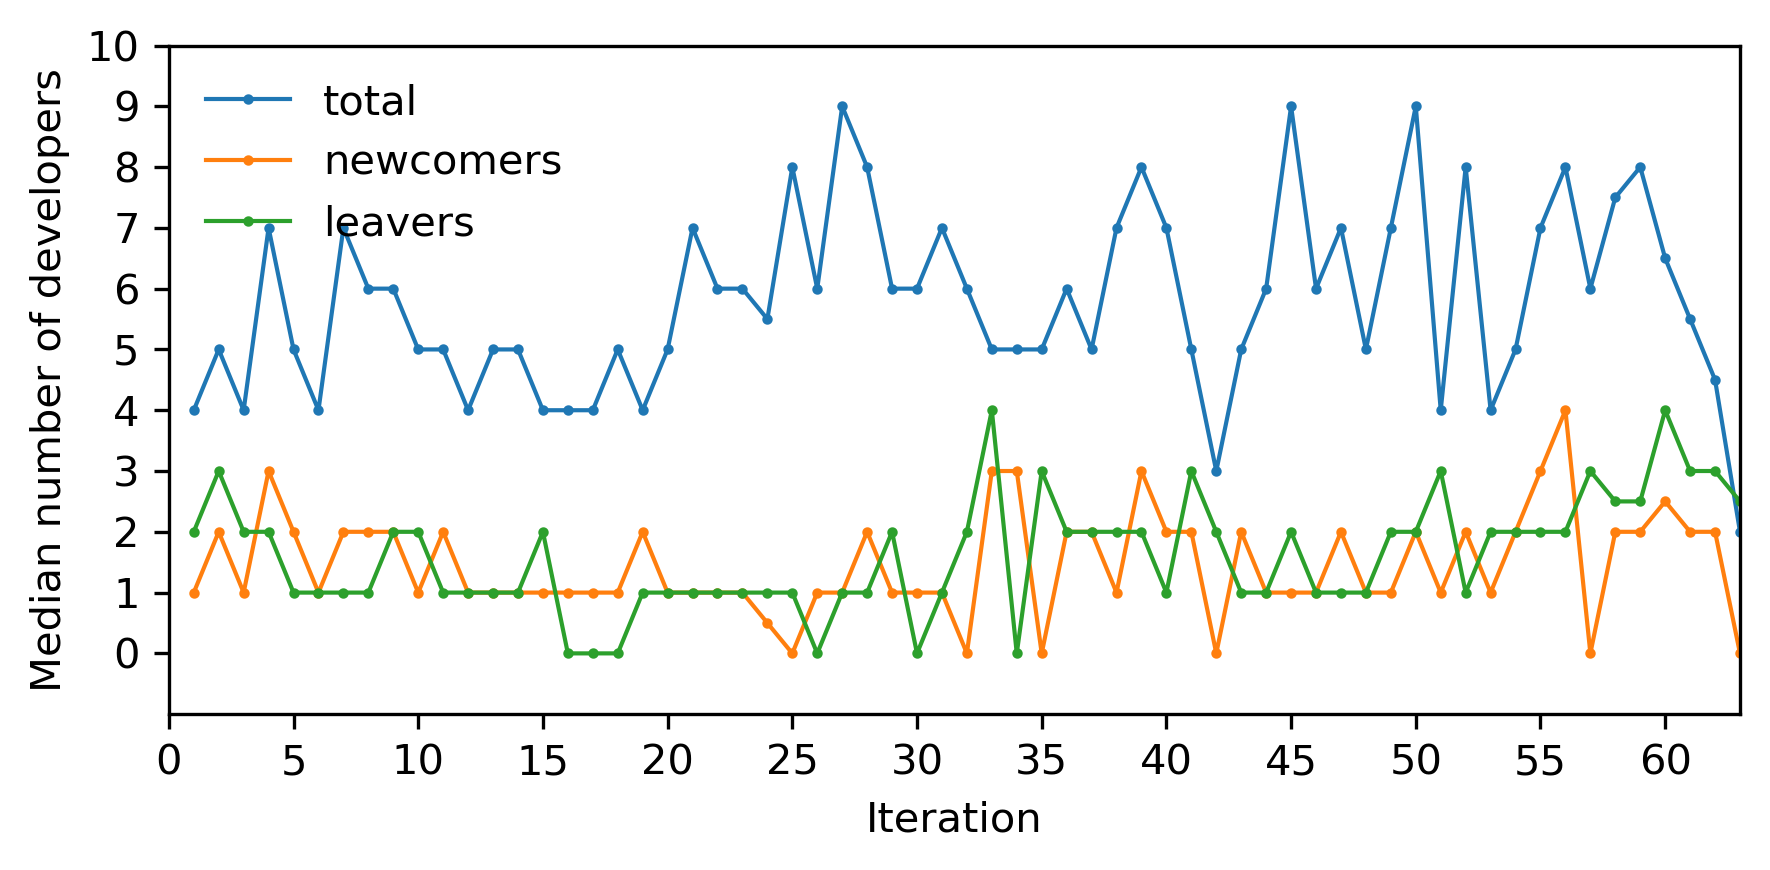

In [11]:
dfx = df.pivot_table(index='sprint.nbr', columns='project', values=['turnover_abs', 'new_devs_abs', 'current_devs_abs'])

fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(1, 1, 1)

x = dfx.median(axis=1, level=0)

# 63 is the median
x.plot(style='o-', linewidth=1, markersize=1.5, xlim=(0,63), ylim=(-1,10), ax=ax)

ax.set_xlabel('Iteration')
ax.set_ylabel('Median number of developers')

ax.legend(labels=['total', 'newcomers', 'leavers'], loc='upper left', frameon=False)

plt.yticks(np.arange(0, 11, 1.0))
plt.xticks(np.arange(0, 64, 5.0))

plt.tight_layout()

plt.savefig('img/newcomers_vs_leavers.png')

In [12]:
dfx = df.pivot_table(index='sprint.nbr', columns='project', values=['turnover_abs', 'new_devs_abs', 'velocity'])
dfx

new_devs_abs                                    turnover_abs        \
project          apstud mesos mule nexus timob tistud   xd       apstud mesos   
sprint.nbr                                                                      
1.0                 1.0   4.0  1.0   1.0   1.0    2.0  1.0          0.0   0.0   
2.0                 1.0   4.0  6.0   2.0   1.0    2.0  5.0          0.0  20.0   
3.0                 0.0   0.0  4.0   4.0   1.0    0.0  2.0          1.0   2.0   
4.0                 1.0   5.0  0.0   4.0   7.0    1.0  3.0          0.0   2.0   
5.0                 0.0   2.0  0.0   4.0   5.0    0.0  8.0          1.0   0.0   
...                 ...   ...  ...   ...   ...    ...  ...          ...   ...   
89.0                NaN   NaN  2.0   NaN   NaN    NaN  NaN          NaN   NaN   
90.0                NaN   NaN  0.0   NaN   NaN    NaN  NaN          NaN   NaN   
91.0                NaN   NaN  2.0   NaN   NaN    NaN  NaN          NaN   NaN   
92.0                NaN   NaN  1.0   NaN   NaN    NaN  NaN          NaN   NaN   
93.0                NaN   NaN  2.0   NaN   NaN    NaN  NaN          NaN   NaN   

                 ...                    velocity                           \
project    mule  ... timob tistud    xd   apstud  mesos  mule nexus timob   
sprint.nbr       ...                                                        
1.0         2.0  ...   1.0    2.0  10.0    228.0   55.0  21.0  16.0   3.0   
2.0         3.0  ...   1.0    1.0   5.0    168.0  102.0  32.0  27.0  21.0   
3.0         3.0  ...   1.0    0.0   3.0    127.0   20.0  25.0  16.0   8.0   
4.0         6.0  ...   1.0    0.0  10.0    121.0  111.0   5.0   5.0   3.5   
5.0         0.0  ...   3.0    2.0   4.0    111.0   63.0   3.0   1.0   6.0   
...         ...  ...   ...    ...   ...      ...    ...   ...   ...   ...   
89.0        1.0  ...   NaN    NaN   NaN      NaN    NaN  82.0   NaN   NaN   
90.0        0.0  ...   NaN    NaN   NaN      NaN    NaN  36.0   NaN   NaN   
91.0        3.0  ...   NaN    NaN   NaN      NaN    NaN  18.0   NaN   NaN   
92.0        0.0  ...   NaN    NaN   NaN      NaN    NaN  69.0   NaN   NaN   
93.0        3.0  ...   NaN    NaN   NaN      NaN    NaN   4.0   NaN   NaN   

                          
project    tistud     xd  
sprint.nbr                
1.0          96.0    8.0  
2.0          93.0   13.0  
3.0         257.0   36.0  
4.0         274.0  123.0  
5.0         132.0  165.0  
...           ...    ...  
89.0          NaN    NaN  
90.0          NaN    NaN  
91.0          NaN    NaN  
92.0          NaN    NaN  
93.0          NaN    NaN  

[93 rows x 21 columns]

In [13]:
dfx2 = dfx.swaplevel(axis=1)
dfx2

project          apstud        mesos         mule        nexus        timob  \
           new_devs_abs new_devs_abs new_devs_abs new_devs_abs new_devs_abs   
sprint.nbr                                                                    
1.0                 1.0          4.0          1.0          1.0          1.0   
2.0                 1.0          4.0          6.0          2.0          1.0   
3.0                 0.0          0.0          4.0          4.0          1.0   
4.0                 1.0          5.0          0.0          4.0          7.0   
5.0                 0.0          2.0          0.0          4.0          5.0   
...                 ...          ...          ...          ...          ...   
89.0                NaN          NaN          2.0          NaN          NaN   
90.0                NaN          NaN          0.0          NaN          NaN   
91.0                NaN          NaN          2.0          NaN          NaN   
92.0                NaN          NaN          1.0          NaN          NaN   
93.0                NaN          NaN          2.0          NaN          NaN   

project          tistud           xd       apstud        mesos         mule  \
           new_devs_abs new_devs_abs turnover_abs turnover_abs turnover_abs   
sprint.nbr                                                                    
1.0                 2.0          1.0          0.0          0.0          2.0   
2.0                 2.0          5.0          0.0         20.0          3.0   
3.0                 0.0          2.0          1.0          2.0          3.0   
4.0                 1.0          3.0          0.0          2.0          6.0   
5.0                 0.0          8.0          1.0          0.0          0.0   
...                 ...          ...          ...          ...          ...   
89.0                NaN          NaN          NaN          NaN          1.0   
90.0                NaN          NaN          NaN          NaN          0.0   
91.0                NaN          NaN          NaN          NaN          3.0   
92.0                NaN          NaN          NaN          NaN          0.0   
93.0                NaN          NaN          NaN          NaN          3.0   

project     ...        timob       tistud           xd   apstud    mesos  \
            ... turnover_abs turnover_abs turnover_abs velocity velocity   
sprint.nbr  ...                                                            
1.0         ...          1.0          2.0         10.0    228.0     55.0   
2.0         ...          1.0          1.0          5.0    168.0    102.0   
3.0         ...          1.0          0.0          3.0    127.0     20.0   
4.0         ...          1.0          0.0         10.0    121.0    111.0   
5.0         ...          3.0          2.0          4.0    111.0     63.0   
...         ...          ...          ...          ...      ...      ...   
89.0        ...          NaN          NaN          NaN      NaN      NaN   
90.0        ...          NaN          NaN          NaN      NaN      NaN   
91.0        ...          NaN          NaN          NaN      NaN      NaN   
92.0        ...          NaN          NaN          NaN      NaN      NaN   
93.0        ...          NaN          NaN          NaN      NaN      NaN   

project        mule    nexus    timob   tistud       xd  
           velocity velocity velocity velocity velocity  
sprint.nbr                                               
1.0            21.0     16.0      3.0     96.0      8.0  
2.0            32.0     27.0     21.0     93.0     13.0  
3.0            25.0     16.0      8.0    257.0     36.0  
4.0             5.0      5.0      3.5    274.0    123.0  
5.0             3.0      1.0      6.0    132.0    165.0  
...             ...      ...      ...      ...      ...  
89.0           82.0      NaN      NaN      NaN      NaN  
90.0           36.0      NaN      NaN      NaN      NaN  
91.0           18.0      NaN      NaN      NaN      NaN  
92.0           69.0      

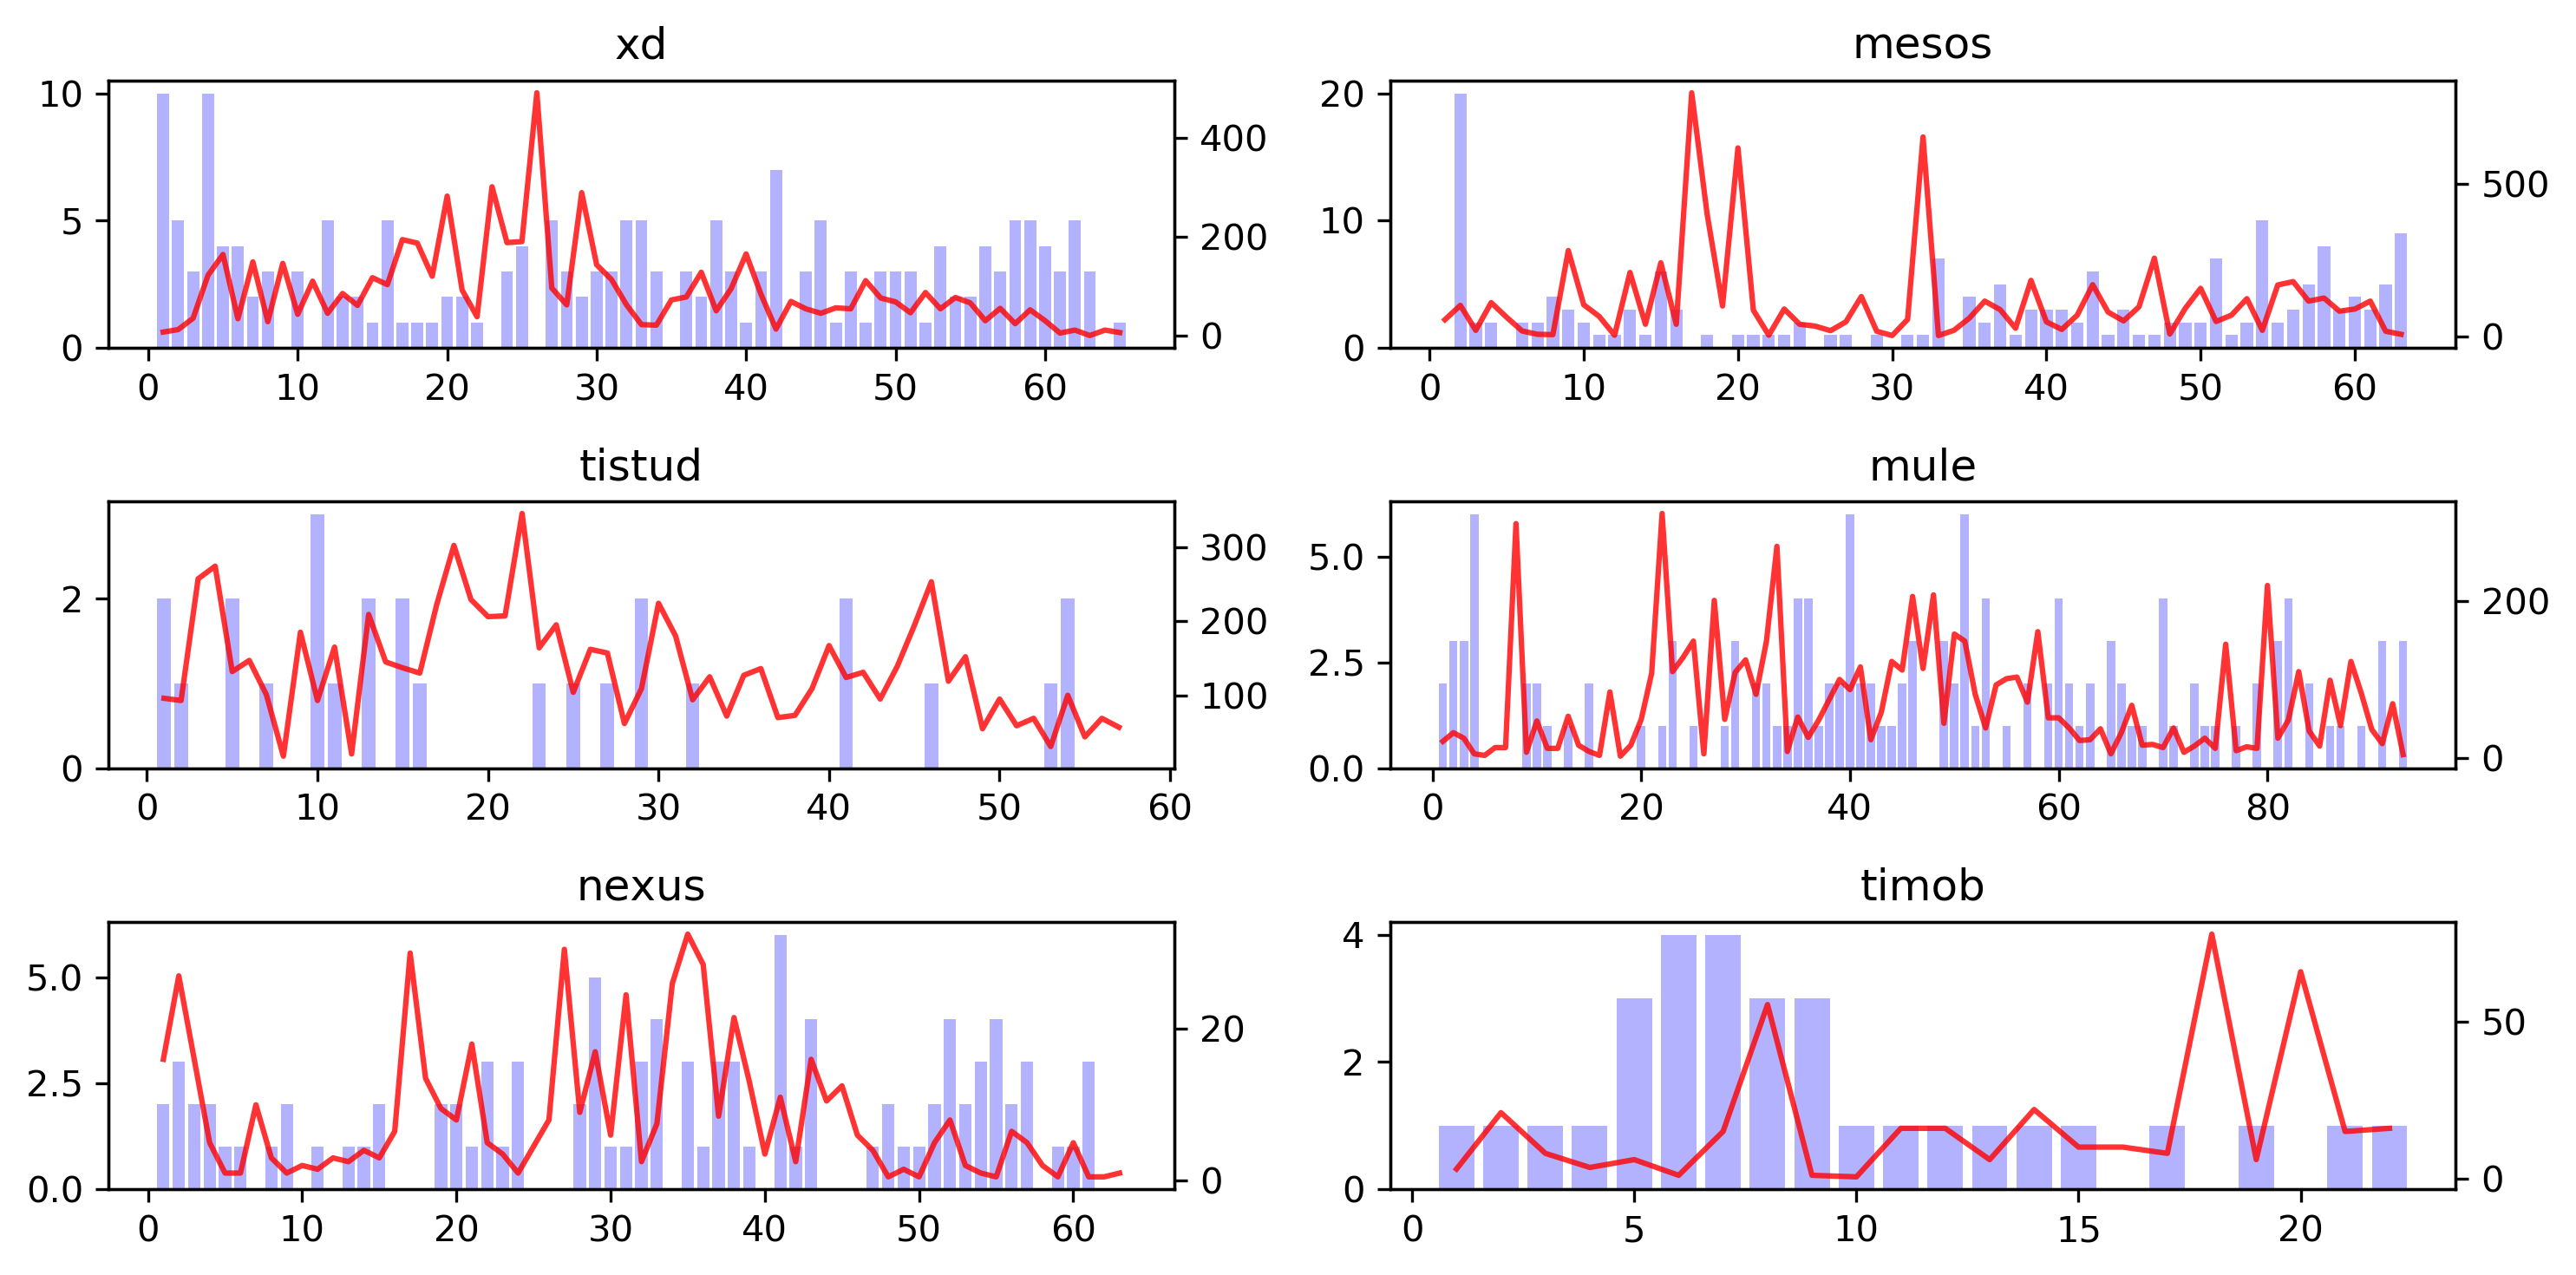

In [14]:
fig = plt.figure(figsize=(10,5), dpi=300)

i=0
for p in ['xd', 'mesos', 'tistud', 'mule', 'nexus', 'timob']:
    i = i + 1
    ax = fig.add_subplot(3, 2, i)
    
    data = dfx2.loc[:, p].dropna()

    ax.bar(data.index, data['turnover_abs'], color='blue', alpha=0.3)
    #ax.bar(data.index, data['new_devs_abs'], color='green', alpha=0.3)
    
    ax2 = ax.twinx()
    
    ax2.plot(data['velocity'], color='red', alpha=0.8)
    
    #ax.set_xlabel('Iteration')
    #ax.set_ylabel('Individual velocity')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()

# Individual velocity

## individual chart

In [15]:
dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

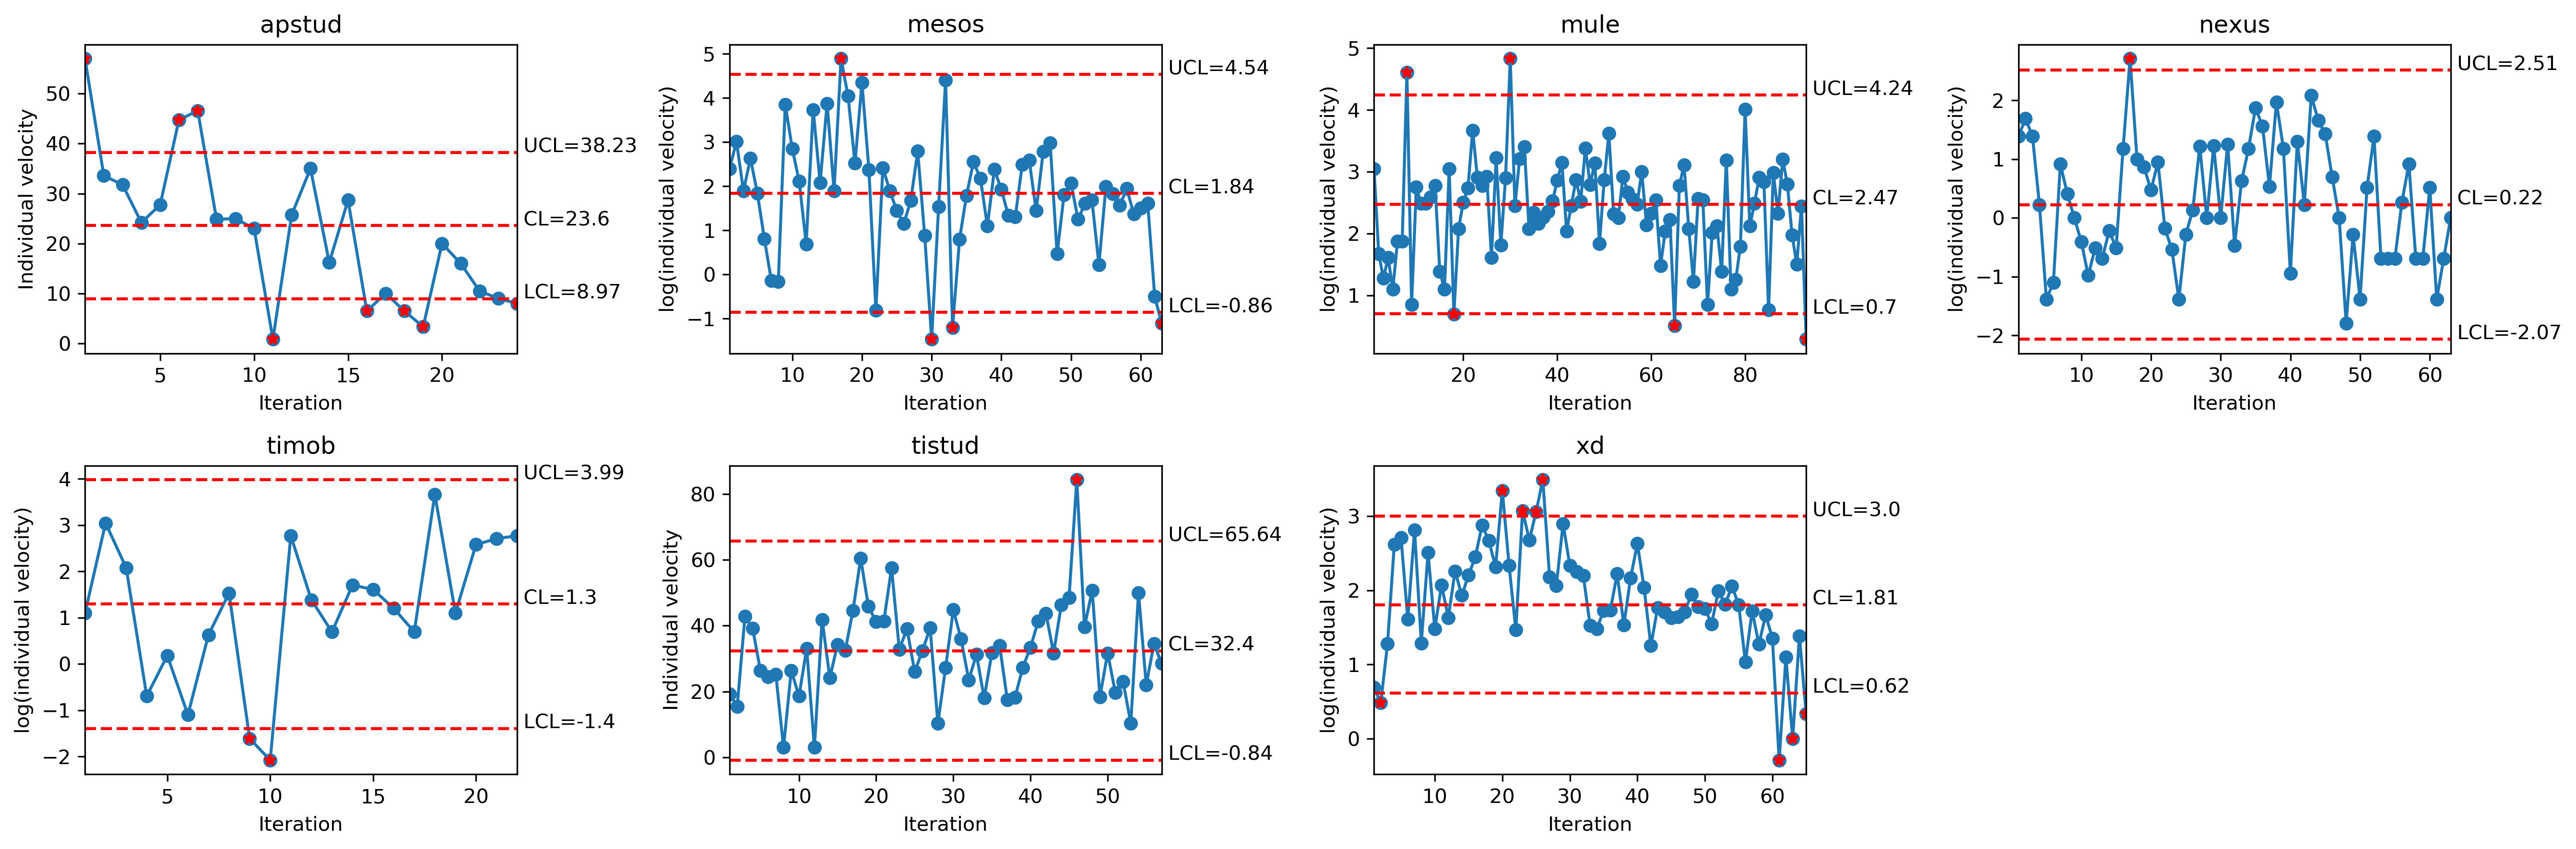

In [16]:
import numpy as np

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

fig = plt.figure(figsize=(18,6), dpi=300)

i=0
for p in dfx.columns:
    i = i + 1
    
    ax = fig.add_subplot(2, 4, i)
    if p in ['apstud', 'tistud']:
        x = dfx.loc[:, p].dropna()
        y_label = "Individual velocity"
    else: #     ['mesos', 'mule', 'nexus', 'timob', 'xd']
        x = np.log(dfx.loc[:, p].dropna())
        y_label = "log(individual velocity)"
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    # individiual control chart
    d2 = 1.128
    xUCL = xbar + 3*meanR/d2
    xLCL = xbar - 3*meanR/d2
    xCL = xbar

    #xLCL = xLCL if xLCL >= 0 else 0

    x.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=xCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(xCL,2)), xy=(len(R), xCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=xUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(xUCL,2)), xy=(len(R), xUCL), xycoords='data', textcoords='data')

    ax.axhline(y=xLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(xLCL,2)), xy=(len(R), xLCL), xycoords='data', textcoords='data')
    
    #dfx.loc[ dfx[p] > xUCL, p].dropna().plot(style='-o', color='red', label='mean', ax=ax)
    
    plt.plot(x[x > xUCL].index, x[x > xUCL], 'r*')
    plt.plot(x[x < xLCL].index, x[x < xLCL], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel(y_label)

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/I_chart_individual_velocity.png')

## MR charts

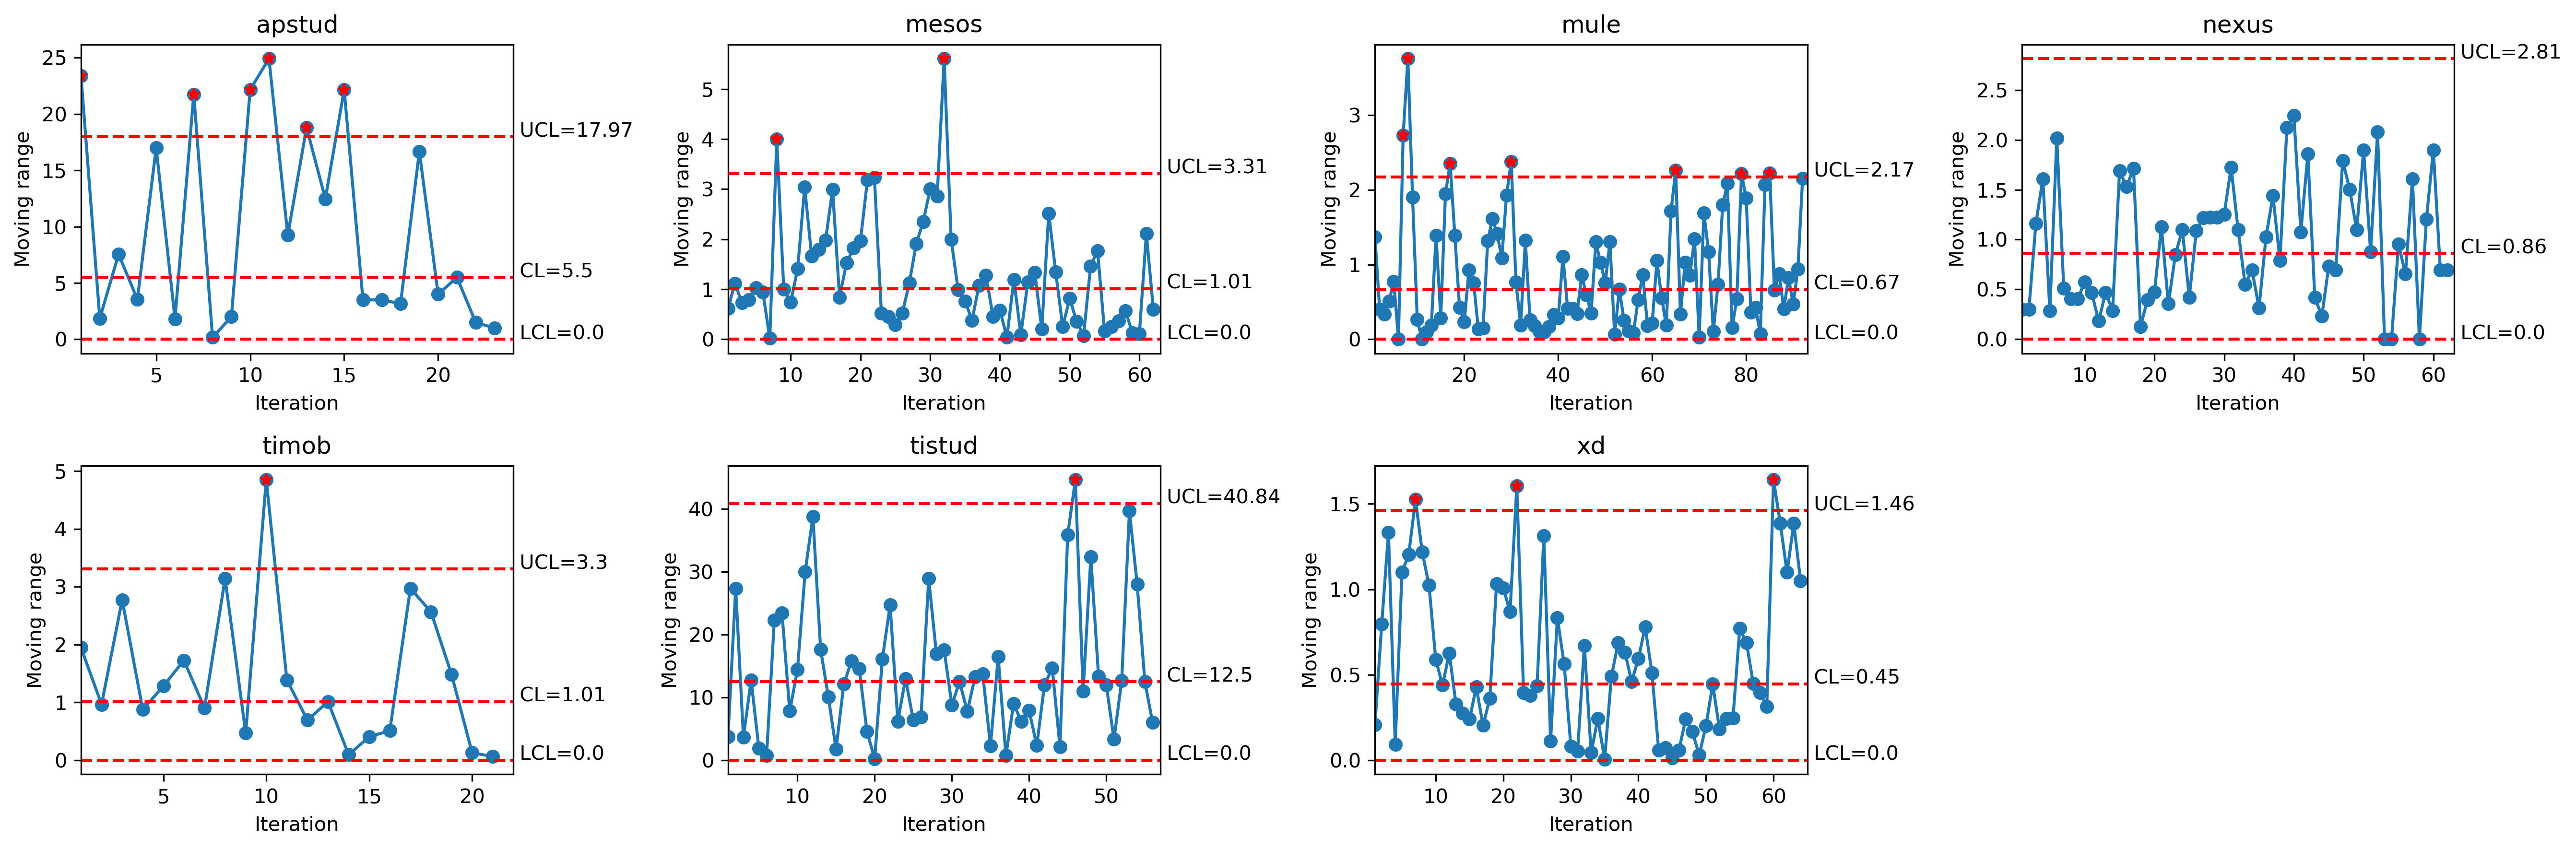

In [17]:
import numpy as np

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

fig = plt.figure(figsize=(18,6), dpi=300)

i=0
for p in dfx.columns:
    i = i + 1
    
    ax = fig.add_subplot(2, 4, i)

    if p in ['apstud', 'tistud']:
        x = dfx.loc[:, p].dropna()
        y_label = "Moving range"
    else: 
        x = np.log(dfx.loc[:, p].dropna())
        y_label = "Moving range"
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    # ranges
    D3 = 0
    D4 = 3.267
    rUCL = D4*meanR 
    rLCL = D3*meanR
    rCL = meanR

    R.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=rCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(rCL,2)), xy=(len(R), rCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=rUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(rUCL,2)), xy=(len(R), rUCL), xycoords='data', textcoords='data')

    ax.axhline(y=rLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(rLCL,2)), xy=(len(R), rLCL), xycoords='data', textcoords='data')

    rLCL = rLCL if rLCL >= 0 else 0
    
    #dfx.loc[ dfx[p] > xUCL, p].dropna().plot(style='-o', color='red', label='mean', ax=ax)
    
    plt.plot(R[R > rUCL].index, R[R > rUCL], 'r*')
    plt.plot(R[R < rLCL].index, R[R < rLCL], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel(y_label)

    ax.set_title(p)
    
plt.tight_layout()
plt.savefig('img/MR_individual_velocity.png')

## I-MR charts

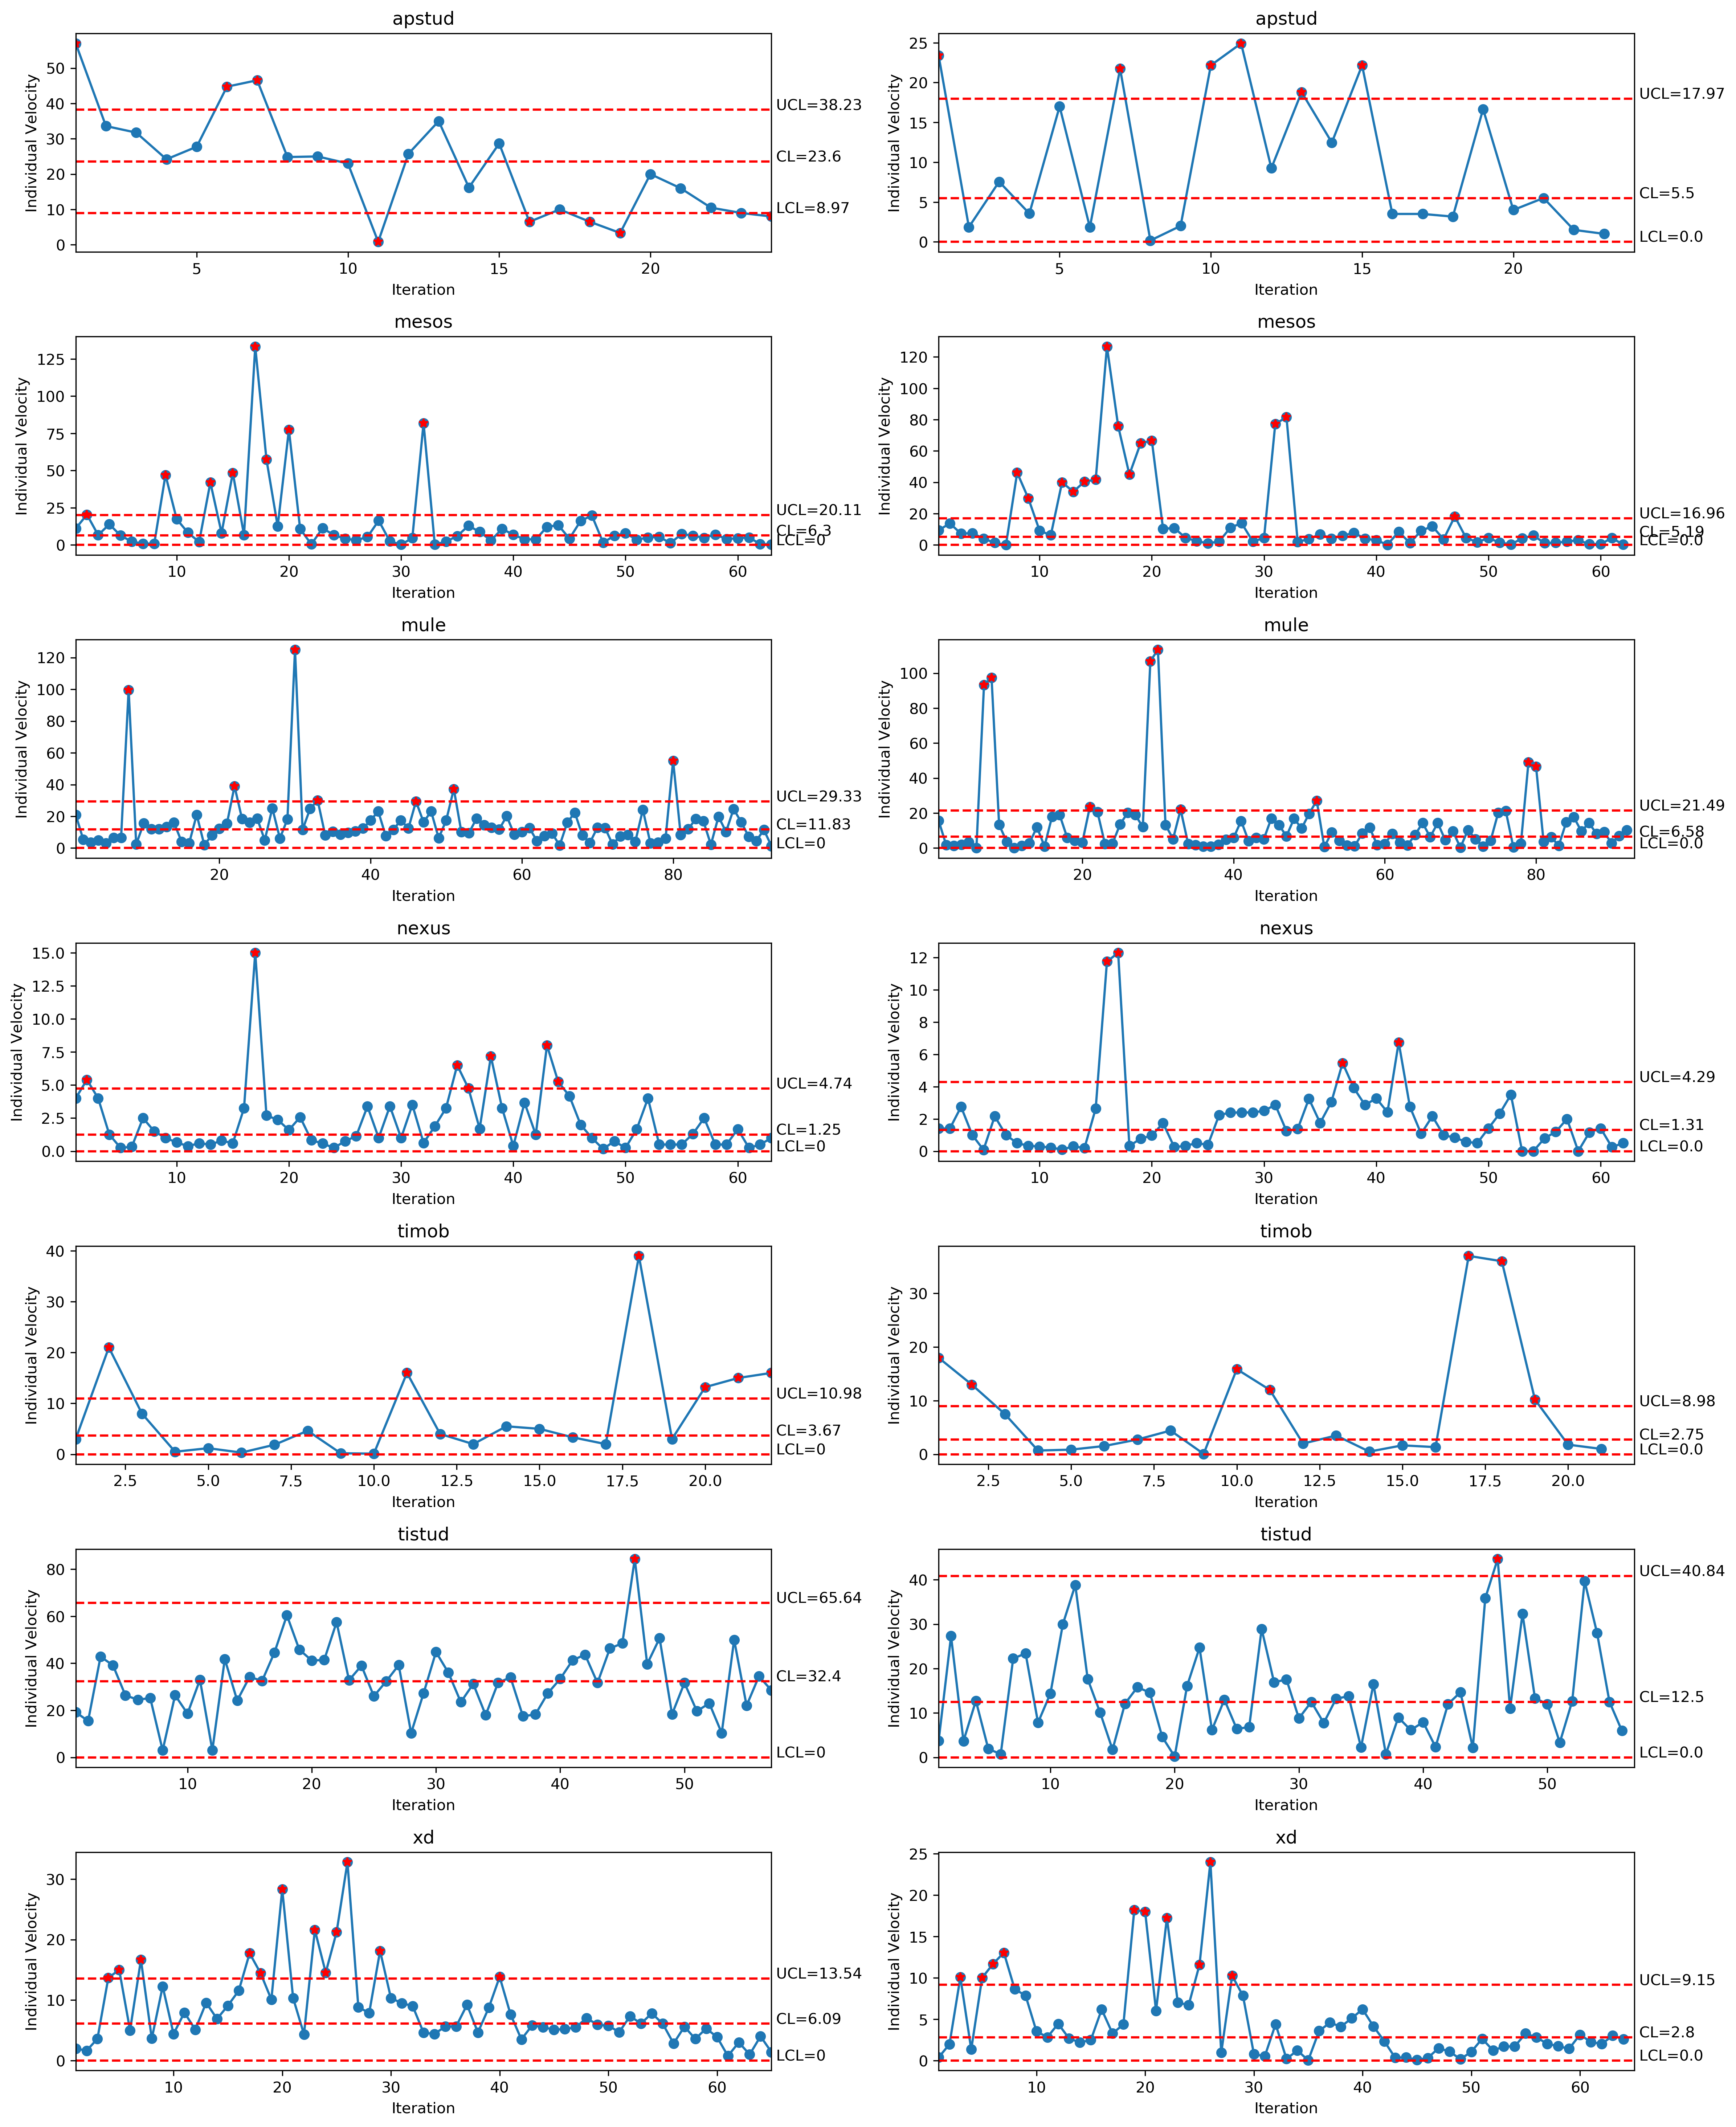

In [18]:
import numpy as np

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='individual_velocity')

fig = plt.figure(figsize=(16,22), dpi=300)

i=0
for p in dfx.columns:
    x = dfx.loc[:, p].dropna()
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    ######################################
    # I chart
    i = i + 1
    ax = fig.add_subplot(8, 2, i)
    
    # individiual control chart
    d2 = 1.128
    xUCL = xbar + 3*meanR/d2
    xLCL = xbar - 3*meanR/d2
    xCL = xbar

    xLCL = xLCL if xLCL >= 0 else 0

    x.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=xCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(xCL,2)), xy=(len(R), xCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=xUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(xUCL,2)), xy=(len(R), xUCL), xycoords='data', textcoords='data')

    ax.axhline(y=xLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(xLCL,2)), xy=(len(R), xLCL), xycoords='data', textcoords='data')
    
    #dfx.loc[ dfx[p] > xUCL, p].dropna().plot(style='-o', color='red', label='mean', ax=ax)
    
    plt.plot(dfx.loc[ dfx[p] > xUCL, p].index, dfx.loc[ dfx[p] > xUCL, p], 'r*')
    plt.plot(dfx.loc[ dfx[p] < xLCL, p].index, dfx.loc[ dfx[p] < xLCL, p], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Individual Velocity')

    ax.set_title(p)
    
    #######################################
    # MR chart
    i = i + 1
    ax = fig.add_subplot(8, 2, i)
    
    # ranges
    D3 = 0
    D4 = 3.267
    rUCL = D4*meanR 
    rLCL = D3*meanR
    rCL = meanR

    R.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=rCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(rCL,2)), xy=(len(R), rCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=rUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(rUCL,2)), xy=(len(R), rUCL), xycoords='data', textcoords='data')

    ax.axhline(y=rLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(rLCL,2)), xy=(len(R), rLCL), xycoords='data', textcoords='data')

    rLCL = rLCL if rLCL >= 0 else 0
    
    #dfx.loc[ dfx[p] > xUCL, p].dropna().plot(style='-o', color='red', label='mean', ax=ax)
    
    plt.plot(R[R > rUCL].index, R[R > rUCL], 'r*')
    plt.plot(R[R < rLCL].index, R[R < rLCL], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Individual Velocity')

    ax.set_title(p)

plt.tight_layout()
plt.savefig('img/I-MR_individual_velocity.png')

# focus factor

## individual chart

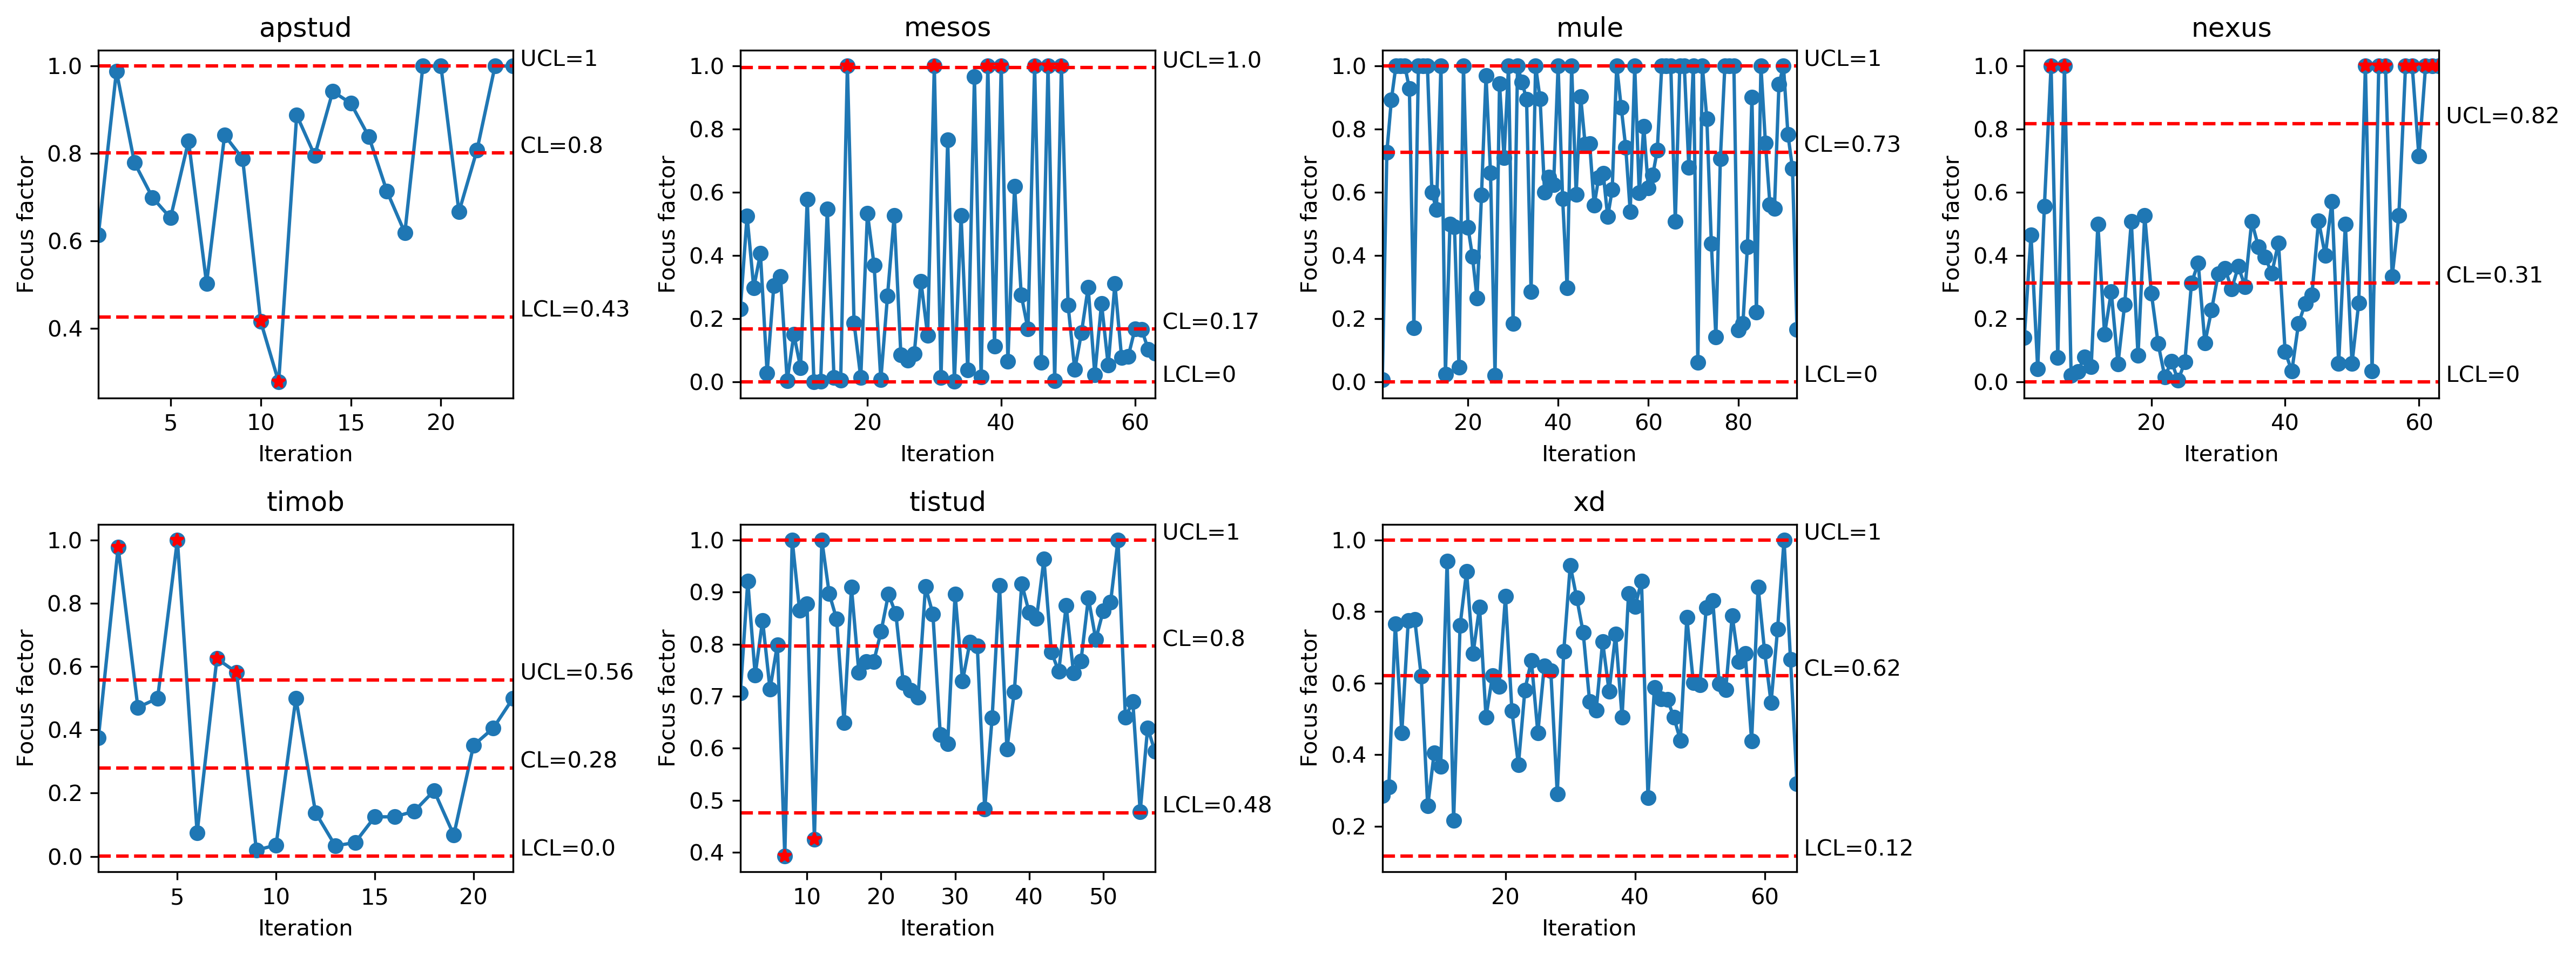

In [19]:
dfx = df.pivot_table(index='sprint.nbr', columns='project', values='focus_factor')

fig = plt.figure(figsize=(16,6), dpi=300)

i=0
for p in dfx.columns:
    i = i + 1
    
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    xbar = x.median()
    
    # individiual control chart
    d2 = 1.128
    xUCL = xbar + 3*meanR/d2
    xLCL = xbar - 3*meanR/d2
    xCL = xbar

    xLCL = xLCL if xLCL >= 0 else 0
    xUCL = xUCL if xUCL <= 1 else 1

    x.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=xCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(xCL,2)), xy=(len(R), xCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=xUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(xUCL,2)), xy=(len(R), xUCL), xycoords='data', textcoords='data')

    ax.axhline(y=xLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(xLCL,2)), xy=(len(R), xLCL), xycoords='data', textcoords='data')
    
    # plot out of control
    plt.plot(dfx.loc[ dfx[p] > xUCL, p].index, dfx.loc[ dfx[p] > xUCL, p], 'r*')
    plt.plot(dfx.loc[ dfx[p] < xLCL, p].index, dfx.loc[ dfx[p] < xLCL, p], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Focus factor')

    ax.set_title(p)
    
plt.tight_layout()
plt.savefig('img/I_chart_focus_factor.png')

## MR chart

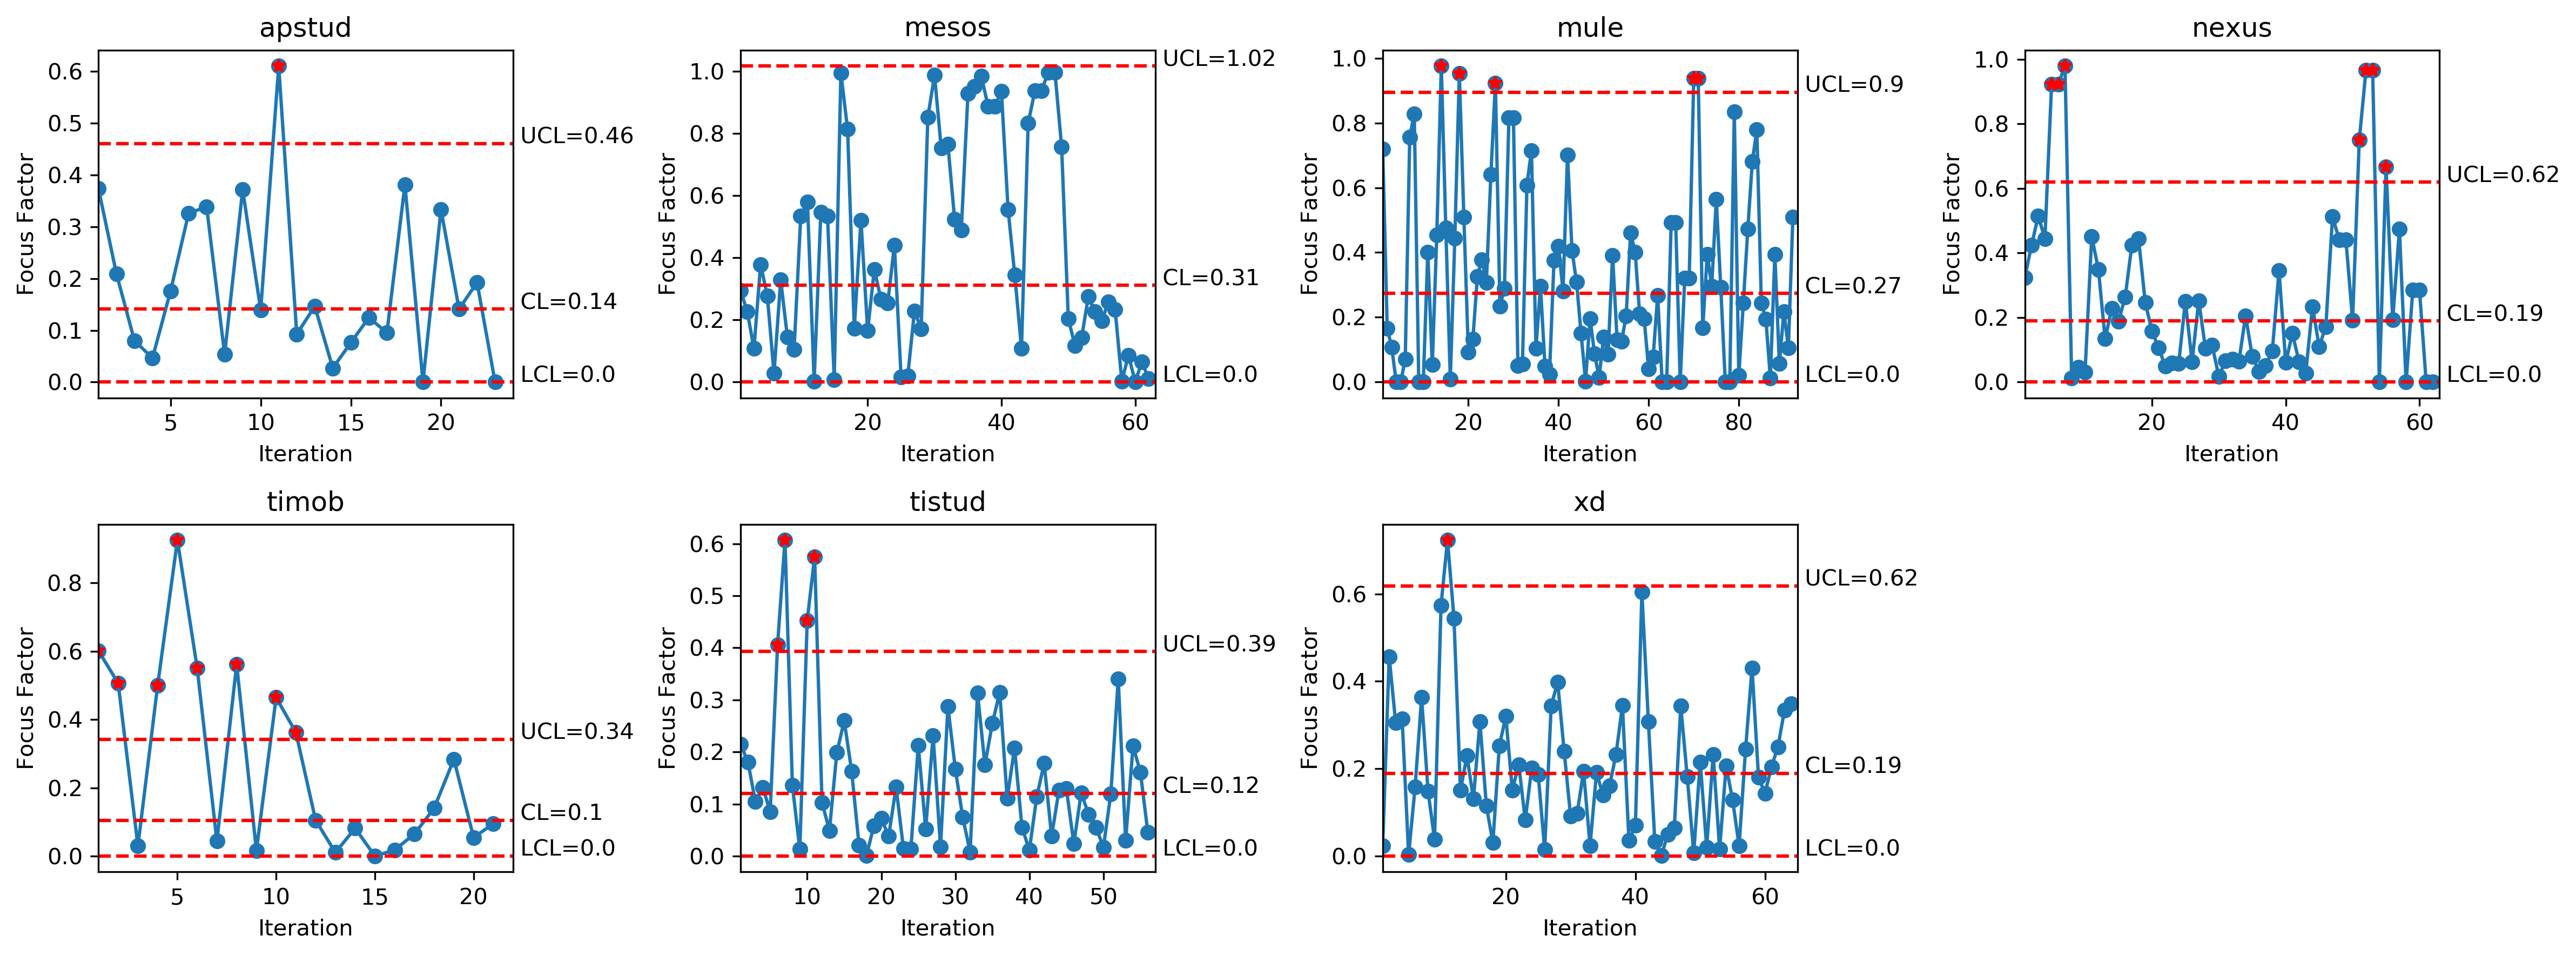

In [20]:
import numpy as np

dfx = df.pivot_table(index='sprint.nbr', columns='project', values='focus_factor')

fig = plt.figure(figsize=(16,6), dpi=300)

i=0
for p in dfx.columns:
    i = i + 1
    
    ax = fig.add_subplot(2, 4, i)
    
    x = dfx.loc[:, p].dropna()
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    #R = R.iloc[::2]
    meanR = R.median()
    
    # ranges
    D3 = 0
    D4 = 3.267
    rUCL = D4*meanR 
    rLCL = D3*meanR
    rCL = meanR

    R.plot(style='-o', label='mean', ax=ax)

    ax.axhline(y=rCL, linestyle='--', color='red', label='MR')
    ax.annotate(' CL=' + str(round(rCL,2)), xy=(len(R), rCL), xycoords='data', textcoords='data')
    
    ax.axhline(y=rUCL, linestyle='--', color='red', label='UCL')
    ax.annotate(' UCL=' + str(round(rUCL,2)), xy=(len(R), rUCL), xycoords='data', textcoords='data')

    ax.axhline(y=rLCL, linestyle='--', color='red', label='LCL')
    ax.annotate(' LCL=' + str(round(rLCL,2)), xy=(len(R), rLCL), xycoords='data', textcoords='data')


    rLCL = rLCL if rLCL >= 0 else 0
    
    #dfx.loc[ dfx[p] > xUCL, p].dropna().plot(style='-o', color='red', label='mean', ax=ax)
    
    plt.plot(R[R > rUCL].index, R[R > rUCL], 'r*')
    plt.plot(R[R < rLCL].index, R[R < rLCL], 'r*')
    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Focus Factor')

    ax.set_title(p)
    #ax[i].legend(loc='lower left', frameon=False)
    
plt.tight_layout()
plt.savefig('img/MR_focus_factor.png')

# zones

In [21]:
def classif(x, m, meanR):
    d2 = 1.128
    if x > xbar + 3*meanR/d2:
        return 'D+'
    elif x > xbar + 2*meanR/d2:
        return 'C+'
    elif x > xbar + 1*meanR/d2:
        return 'B+'
    elif x > m:
        return 'A+'
    elif x > xbar - 1*meanR/d2:
        return 'A-'
    elif x > xbar - 2*meanR/d2:
        return 'B-'
    elif x > xbar - 3*meanR/d2:
        return 'C-'
    else:
        return 'D-'

In [22]:
for p in df['project'].unique():
    dfx = df[df['project'] == p]
    
    if p in ['apstud', 'tistud']:
        x = dfx.loc[:, 'individual_velocity'].dropna()
        y_label = "Individual velocity"
    else: 
        x = np.log(dfx.loc[:, 'individual_velocity'].dropna())
        y_label = "log(individual velocity)"
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    # individiual control chart
    d2 = 1.128
    xUCL = xbar + 3*meanR/d2
    xLCL = xbar - 3*meanR/d2
    xCL = xbar
    
    zone_D_pos = x[x > xUCL].index
    zone_D_neg = x[x < xLCL].index
    
    print(p, zone_D_pos.values, zone_D_neg.values)
    
    sigma = (x - xbar) * d2 / meanR
    
    df.loc[dfx.index, 'sigma_velocity'] = x.apply(lambda e : (e - xbar) * d2 / meanR )

apstud [0 5 6] [10 15 17 18 23]
mesos [40] [53 56 86]
mule [ 94 116] [104 151 179]
nexus [196] []
timob [] [251 252]
tistud [310] []
xd [341 344 346 347] [323 382 384 386]


In [23]:
for p in df['project'].unique():
    dfx = df[df['project'] == p]
    
    x = dfx.loc[:, 'focus_factor'].dropna()
    
    subgroups = 2
    xbar = x.median()
    
    R = np.abs(x - x.shift(-1))
    meanR = R.median()
    
    # individiual control chart
    d2 = 1.128
    xUCL = xbar + 3*meanR/d2
    xLCL = xbar - 3*meanR/d2
    xCL = xbar
    
    zone_D_pos = x[x > xUCL].index
    zone_D_neg = x[x < xLCL].index
    
    print(p, zone_D_pos.values, zone_D_neg.values)
    
    sigma = (x - xbar) * d2 / meanR
    
    df.loc[dfx.index, 'sigma_focusfactor'] = x.apply(lambda e : (e - xbar) * d2 / meanR )

apstud [] [ 9 10]
mesos [40 53 61 63 68 70 72] []
mule [] []
nexus [184 186 231 233 234 237 238 240 241 242] []
timob [244 247 249 250] []
tistud [] [271 275]
xd [] []


In [24]:
df['zone_velocity'] = df['sigma_velocity'].apply( lambda x : 'D+' if x > 3 else 'D-' if x < -3 else 'N')
df['zone_focusfactor'] = df['sigma_focusfactor'].apply( lambda x : 'D+' if x > 3 else 'D-' if x < -3 else 'N')

In [25]:
df.to_csv('processed_data/metrics_iterations_with_zones.csv', index=False, encoding='utf-8')

# summary

In [26]:
df.head(3)

project     sprint.name  issues  velocity  work_capacity  \
0  apstud  2012 Sprint 03      23     228.0          371.0   
1  apstud  2012 Sprint 04      18     168.0          170.0   
2  apstud  2012 Sprint 05      19     127.0          163.0   

            sprint.startDate             sprint.endDate  storypoints  \
0  2012-01-27 00:00:00+00:00  2012-02-10 00:00:00+00:00        233.0   
1  2012-02-10 00:00:00+00:00  2012-02-24 00:00:00+00:00        201.0   
2  2012-02-24 00:00:00+00:00  2012-03-09 00:00:00+00:00        148.0   

   sprint_length  focus_factor  ...  new_devs sprint.nbr       TSI  TSI_inv  \
0           14.0      0.614555  ...  0.071429        1.0  1.333333     0.75   
1           14.0      0.988235  ...  0.055556        2.0  1.333333     0.75   
2           14.0      0.779141  ...  0.000000        3.0  1.333333     0.75   

   individual_velocity             sprint.key  sigma_velocity  \
0                57.00  apstud_2012 Sprint 03        6.850036   
1                33.60  apstud_2012 Sprint 04        2.050909   
2                31.75  apstud_2012 Sprint 05        1.671491   

   sigma_focusfactor  zone_velocity  zone_focusfactor  
0          -1.495873             D+                 N  
1           1.493023              N                 N  
2          -0.179426              N                 N  

[3 rows x 27 columns]

In [27]:
t= pd.concat([df.groupby(['project'])['zone_velocity'].value_counts().unstack().fillna(0).astype(int),
df.groupby(['project'])['zone_focusfactor'].value_counts().unstack().fillna(0).astype(int)], axis=1)

In [28]:
df['sprint_key'] = df.apply(lambda x : x['project'] + '-' + str(x['sprint.nbr']), axis=1)

In [29]:
pd.crosstab(df['zone_velocity'], df['zone_focusfactor'], values='sprint-key', aggfunc='count')

zone_focusfactor    D+   D-      N
zone_velocity                     
D+                 1.0  NaN   11.0
D-                 1.0  1.0   15.0
N                 19.0  3.0  336.0

In [30]:
df.columns

Index(['project', 'sprint.name', 'issues', 'velocity', 'work_capacity',
       'sprint.startDate', 'sprint.endDate', 'storypoints', 'sprint_length',
       'focus_factor', 'fields.assignee.name', 'old_devs', 'old_devs_abs',
       'new_devs_abs', 'turnover_abs', 'current_devs_abs', 'turnover',
       'new_devs', 'sprint.nbr', 'TSI', 'TSI_inv', 'individual_velocity',
       'sprint.key', 'sigma_velocity', 'sigma_focusfactor', 'zone_velocity',
       'zone_focusfactor', 'sprint_key'],
      dtype='object')

# Summary of projects

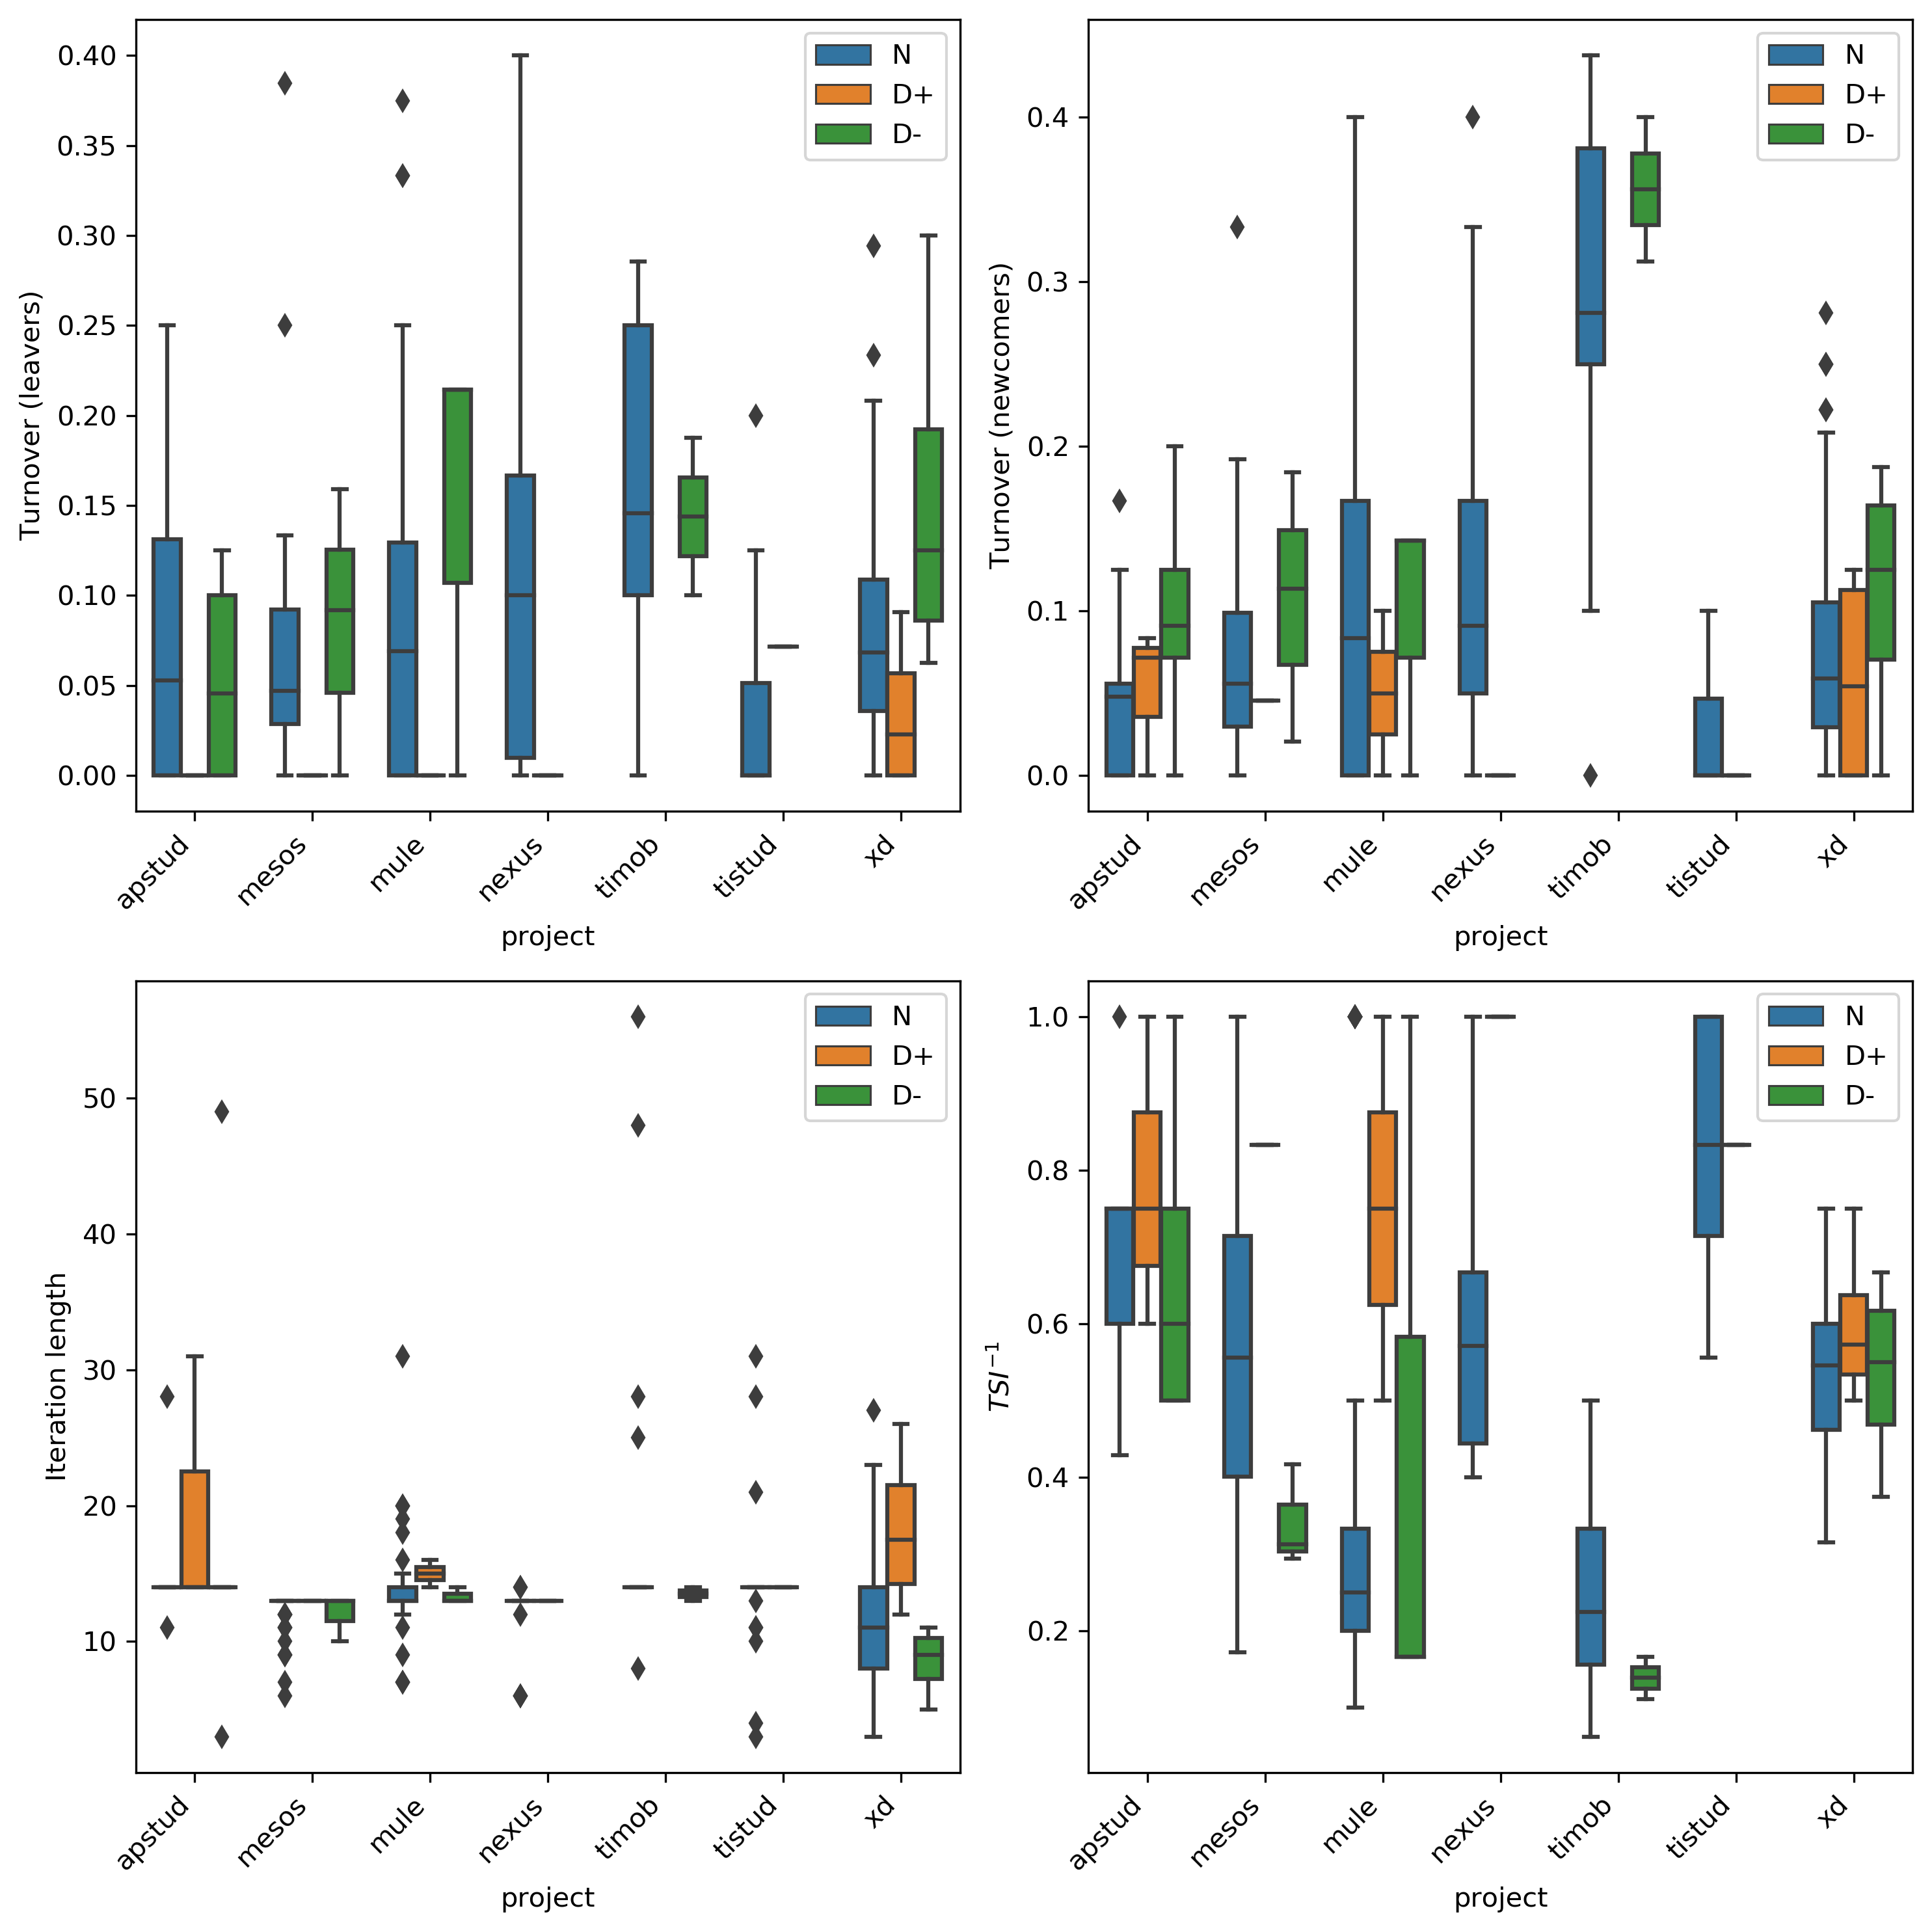

In [31]:
import seaborn as sns

fig = plt.figure(figsize=(10,10), dpi=300)

i=0
y_labels = ['Turnover (leavers)', 'Turnover (newcomers)', 'Iteration length', '${TSI}^{-1}$']
for m in ['turnover', 'new_devs', 'sprint_length', 'TSI_inv']:
    i = i + 1
    ax = fig.add_subplot(2, 2, i)
    sns.boxplot(x='project', y=m, hue='zone_velocity', hue_order=['N', 'D+', 'D-'], data=df, ax=ax, width=0.7)
    
    plt.xticks(rotation=45, ha='right')
    
    ax.set_ylabel(y_labels[i-1])
    
    #ax.get_legend().remove()
    ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('img/factors_zones_velocity.png')

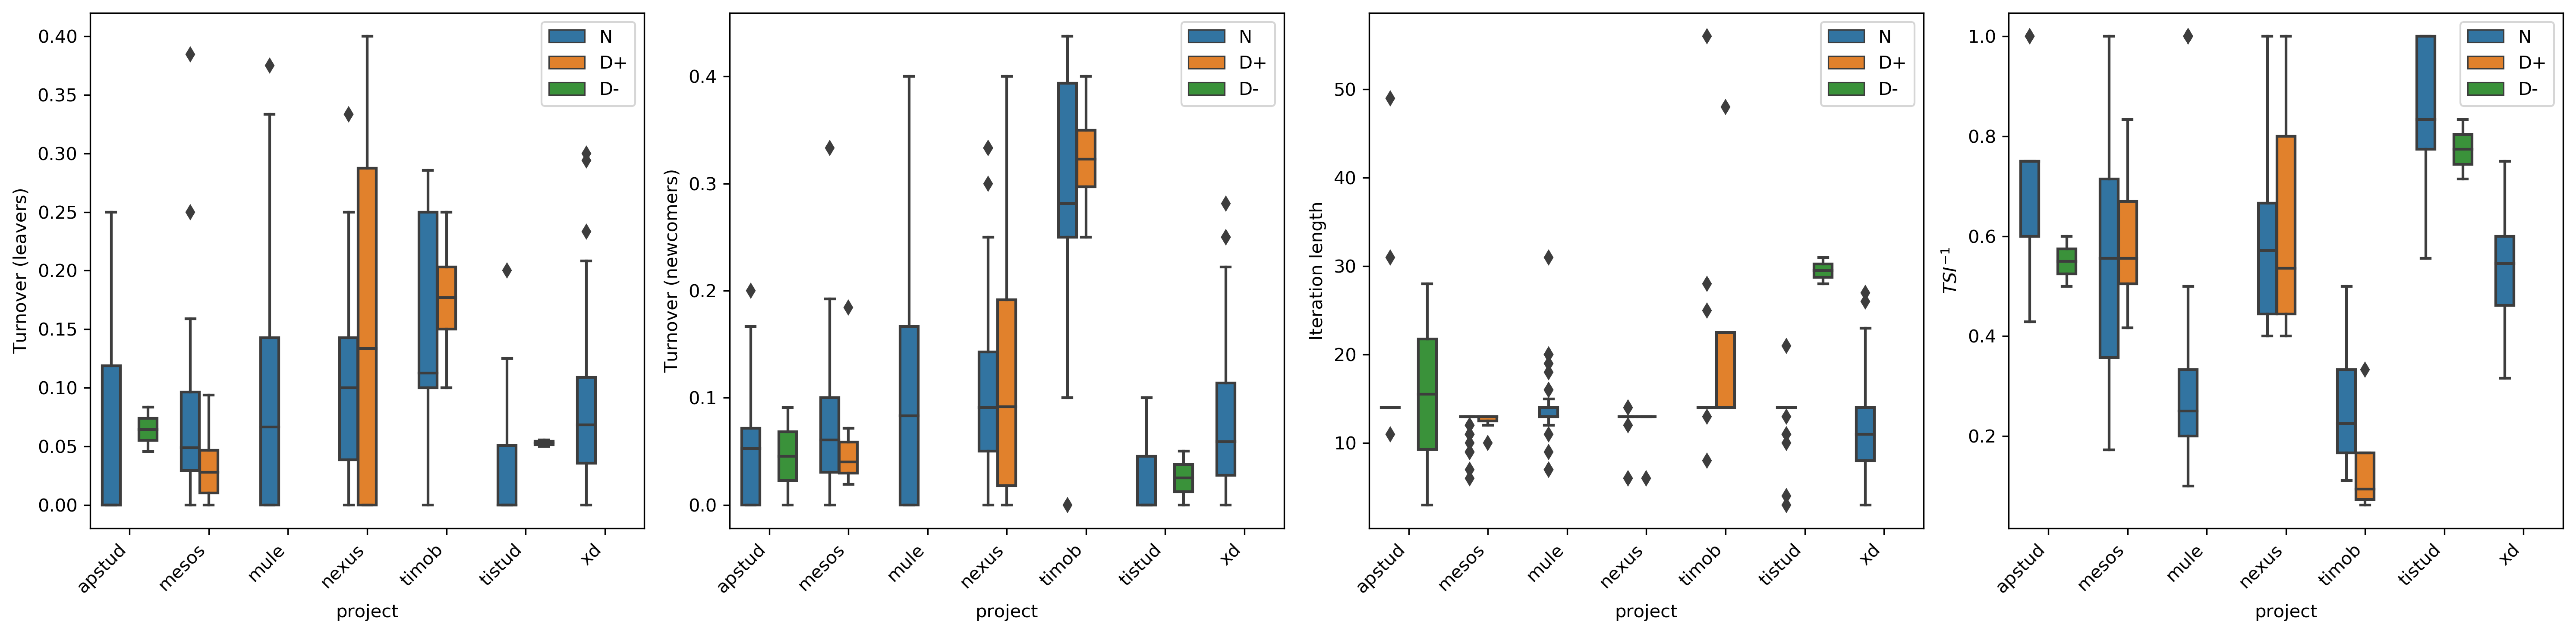

In [32]:
import seaborn as sns

fig = plt.figure(figsize=(20,5), dpi=300)

i=0
y_labels = ['Turnover (leavers)', 'Turnover (newcomers)', 'Iteration length', '${TSI}^{-1}$']
for m in ['turnover', 'new_devs', 'sprint_length', 'TSI_inv']:
    i = i + 1
    ax = fig.add_subplot(1, 4, i)
    sns.boxplot(x='project', y=m, hue='zone_focusfactor',  hue_order=['N', 'D+', 'D-'], data=df, ax=ax, width=0.7)
    
    plt.xticks(rotation=45, ha='right')
    
    ax.set_ylabel(y_labels[i-1])
    
    #ax.get_legend().remove()
    ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('img/factors_zones_focusfactor.png')

# Aggregated results

In [33]:
datax = pd.melt(df, id_vars=['sprint.name','zone_velocity', 'zone_focusfactor'], value_vars= ['turnover', 'new_devs', 'TSI', 'TSI_inv', 'sprint_length'], var_name='factor', value_name='factor_value')

In [34]:
datax2 = pd.melt(datax, id_vars=['sprint.name', 'factor', 'factor_value'] , value_vars=['zone_velocity', 'zone_focusfactor'] )

In [35]:
datax2['variable'].replace({ 'zone_velocity' : 'Velocity', 'zone_focusfactor' : 'Focus factor'}, inplace=True)

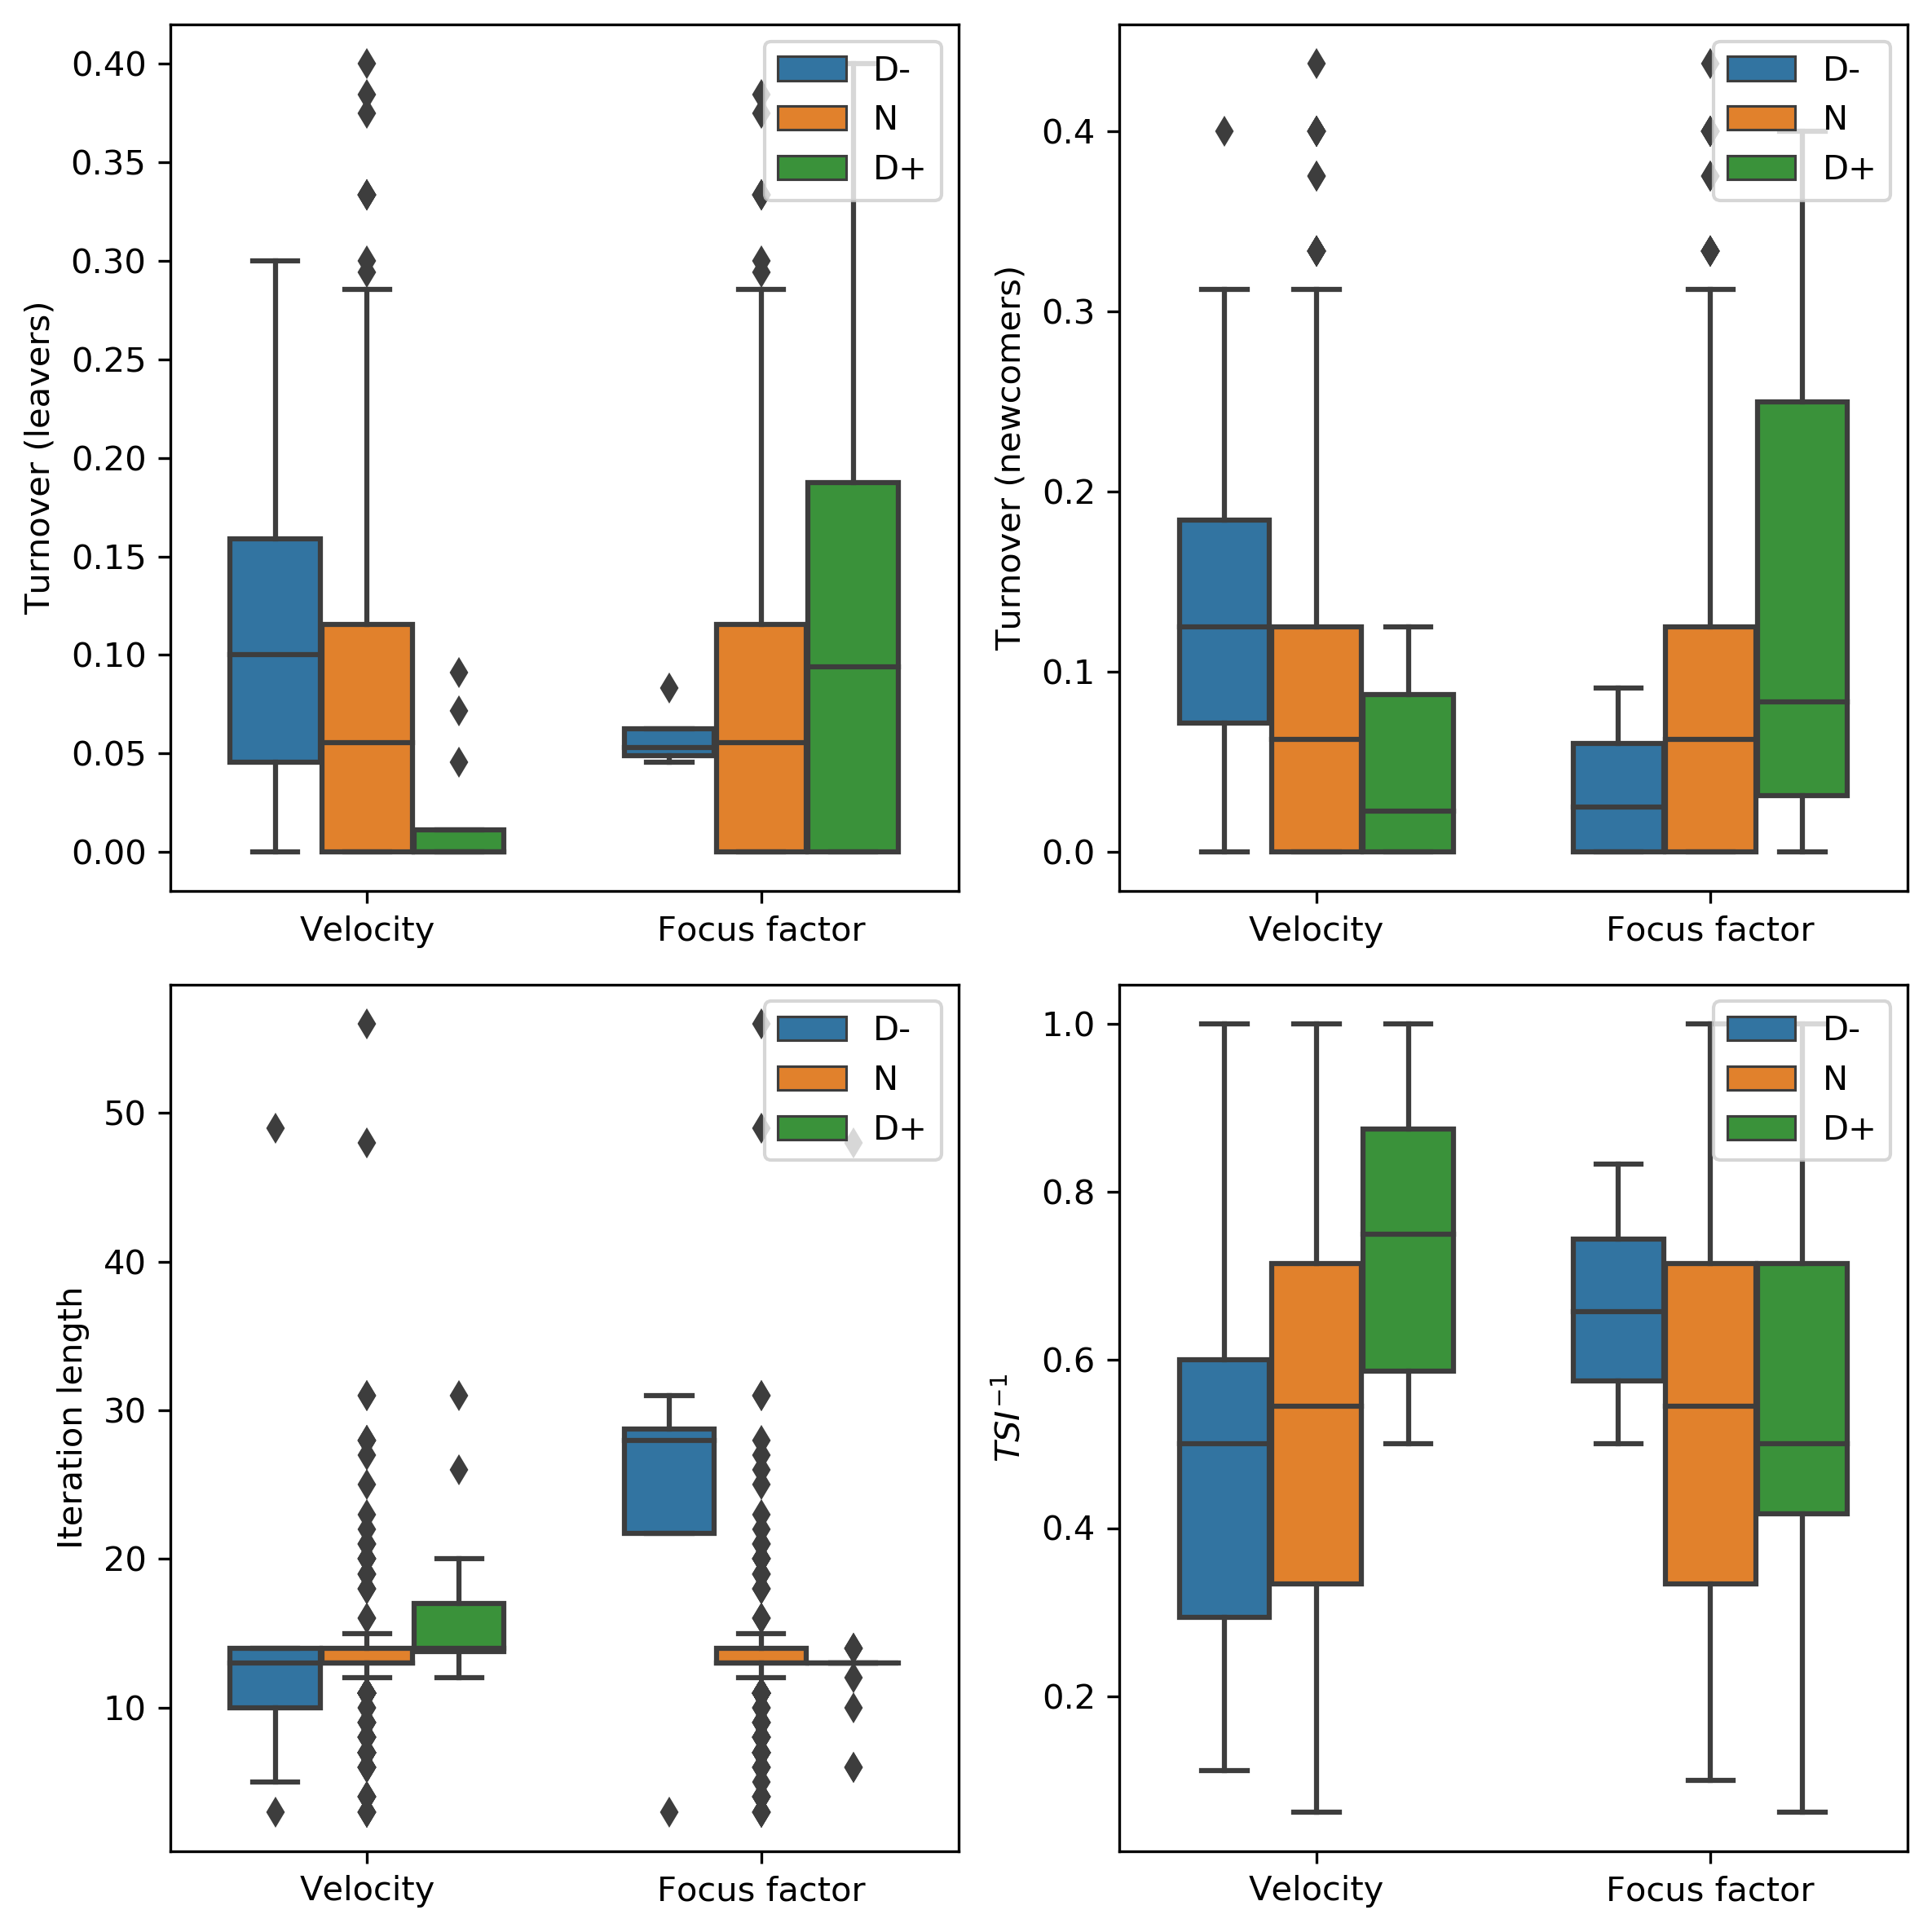

In [36]:
import seaborn as sns

fig = plt.figure(figsize=(8,8), dpi=300)

i=0
y_labels = ['Turnover (leavers)', 'Turnover (newcomers)', 'Iteration length', '${TSI}^{-1}$']
for m in ['turnover', 'new_devs', 'sprint_length', 'TSI_inv']:
    i = i + 1
    ax = fig.add_subplot(2, 2, i)
    sns.boxplot(x='variable', y='factor_value', hue='value',  hue_order=['D-', 'N', 'D+'], data=datax2[datax2['factor'] == m], ax=ax, width=0.7)
    
    ax.set_ylabel(y_labels[i-1])
    ax.legend(loc='upper right', frameon=True)
    ax.set_xlabel('')
    
plt.tight_layout()
plt.savefig('img/agg_factors_zones.png')